In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 8.6 MB/s 
     |████████████████████████████████| 9.8 MB 24.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 7.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller         
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
import arch

import matplotlib.pyplot as plt

In [ ]:
pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 244 kB 9.6 MB/s 
     |████████████████████████████████| 216 kB 51.4 MB/s 
     |████████████████████████████████| 133 kB 59.8 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.13.4-py3-none-any.whl size=84625 sha256=f8d989e57055fdca5d4248b531a6ba607396518cb38008d06bedae85a543b2f2
  Stored in directory: /root/.cache/pip/wheels/81/dd/58/d16612bb43243837f79daa4382cde625c6b5503d6abd8a1b56
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=17740a7988f00f27b986f31445cc77bfc9eeb8e55c0cc33c4280a464c301da9d
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dep

In [ ]:
pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster #wrapper que facilita al forecasting de series de tiempo

In [ ]:
fx = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI-apps-fin/Examen2/USD_MXN.csv', sep=';')

In [ ]:
fx.head()

Date    Price  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   5/4/2017  18.8200         NaN         NaN         NaN         NaN   
1   6/4/2017  18.7405         NaN         NaN         NaN         NaN   
2   7/4/2017  18.6688         NaN         NaN         NaN         NaN   
3  10/4/2017  18.6787         NaN         NaN         NaN         NaN   
4  11/4/2017  18.7813         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN

In [ ]:
fx.index


RangeIndex(start=0, stop=1305, step=1)

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})

In [ ]:
f = Forecaster(y = fx['Price'], current_dates=fx.index)

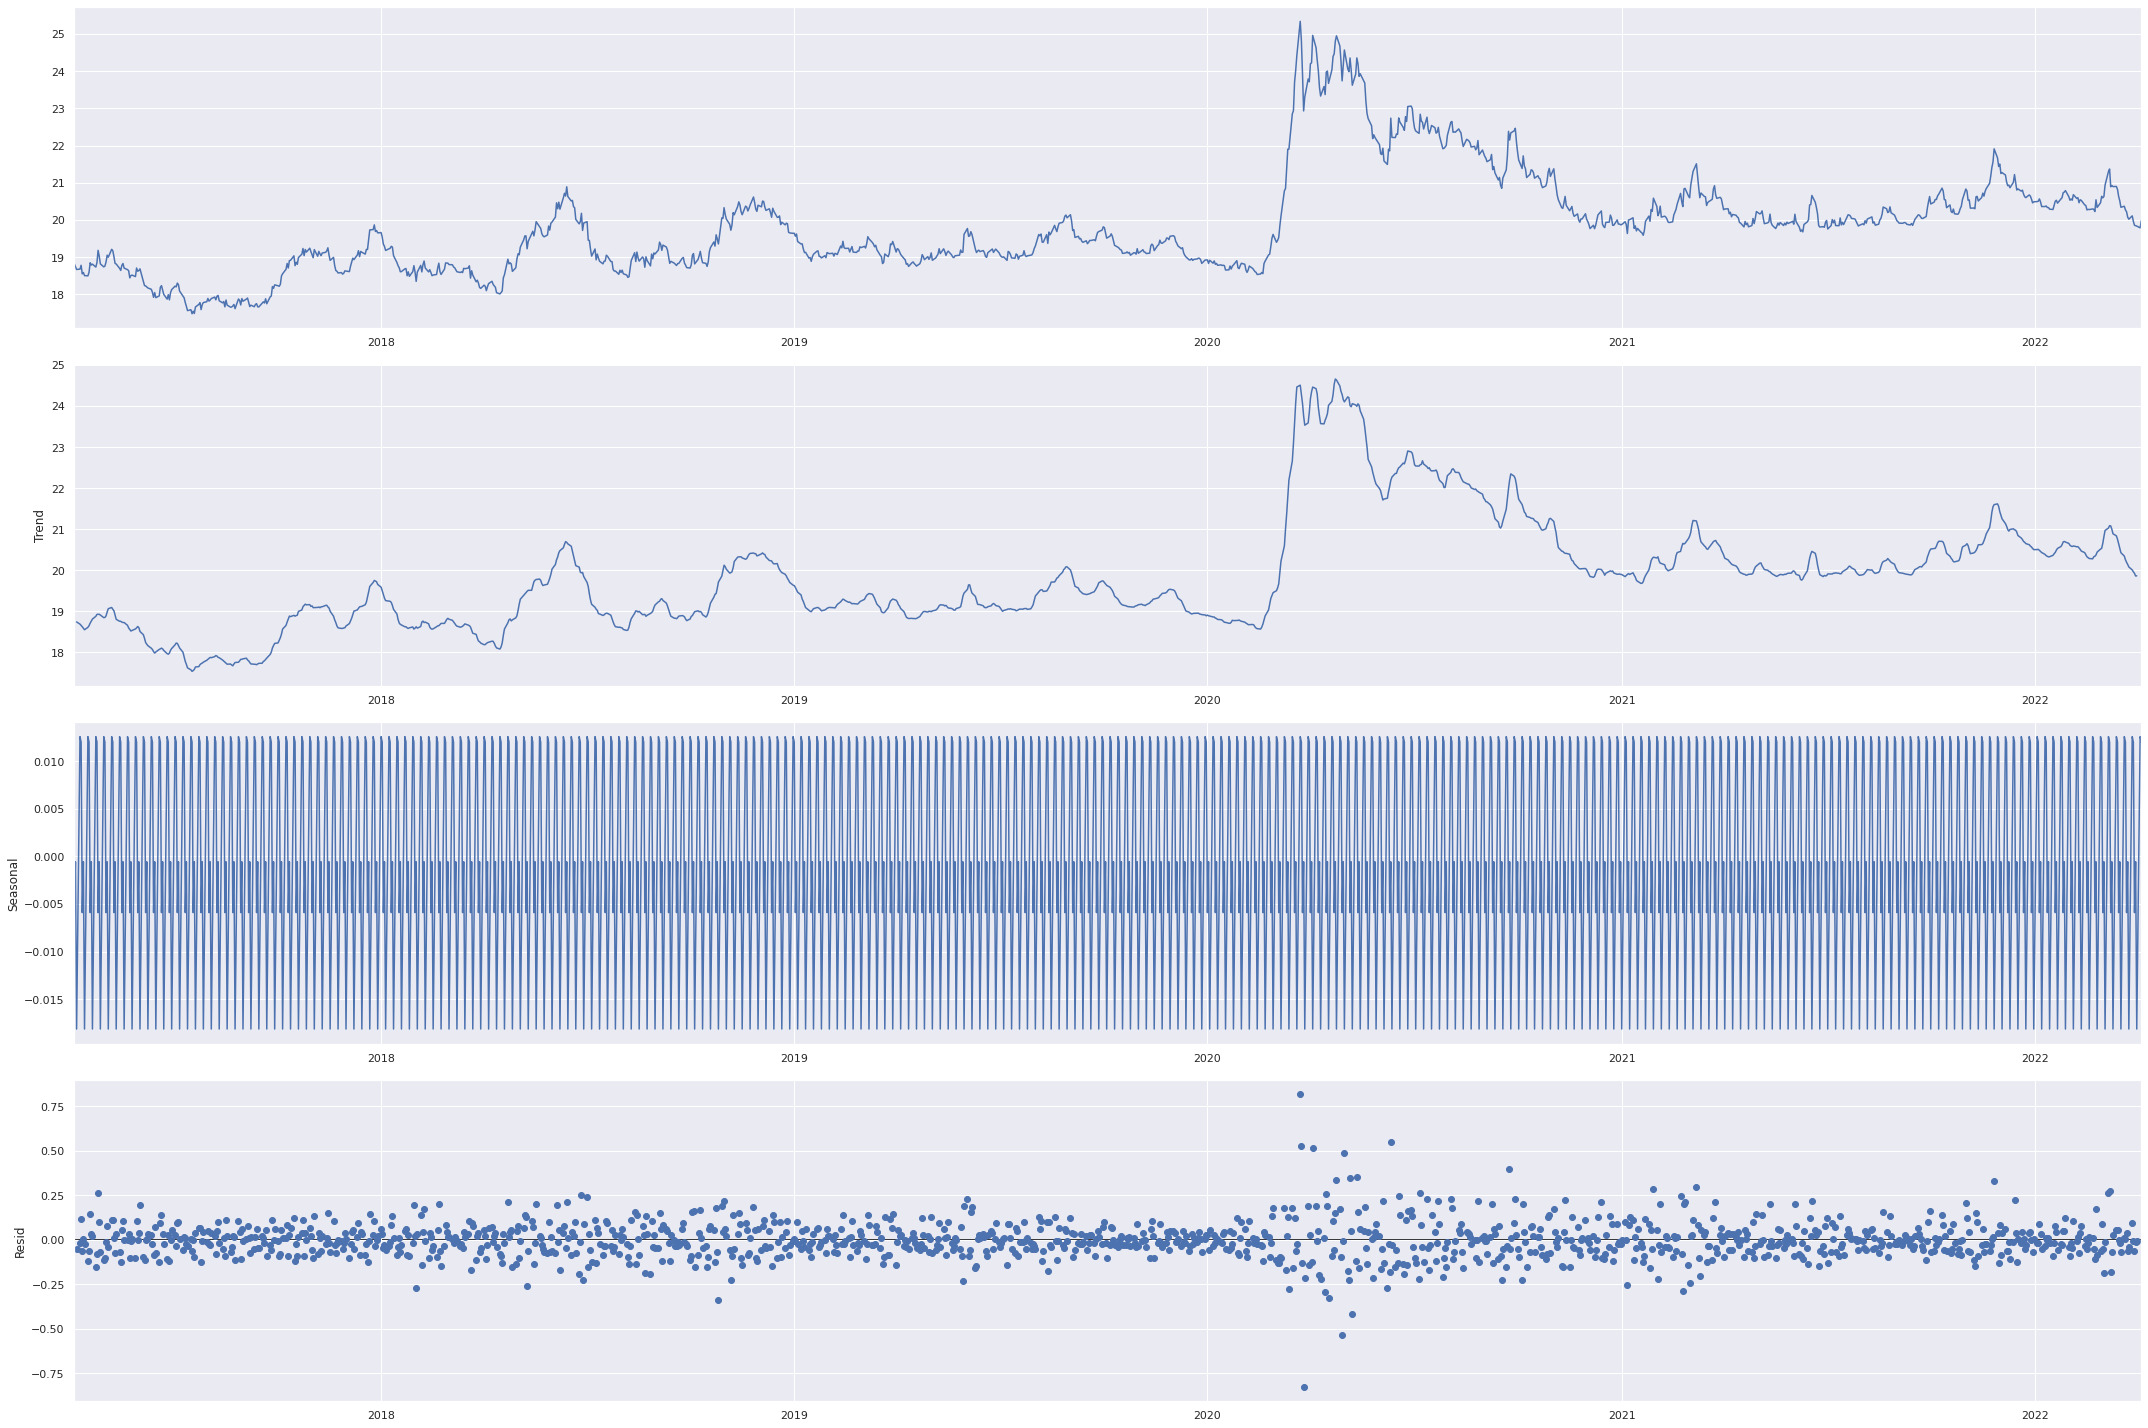

In [ ]:
f.seasonal_decompose().plot()
plt.show()

In [ ]:
#Eliminar columnas con errores
fx = fx[['Date', 'Price']]
fx.head()

Date    Price
0   5/4/2017  18.8200
1   6/4/2017  18.7405
2   7/4/2017  18.6688
3  10/4/2017  18.6787
4  11/4/2017  18.7813

In [ ]:
#Convertir columna Date a fecha
fx['Date'] = pd.to_datetime(fx['Date'], dayfirst=True)

In [ ]:
type(fx['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
fx.set_index('Date', drop= True, inplace = True)

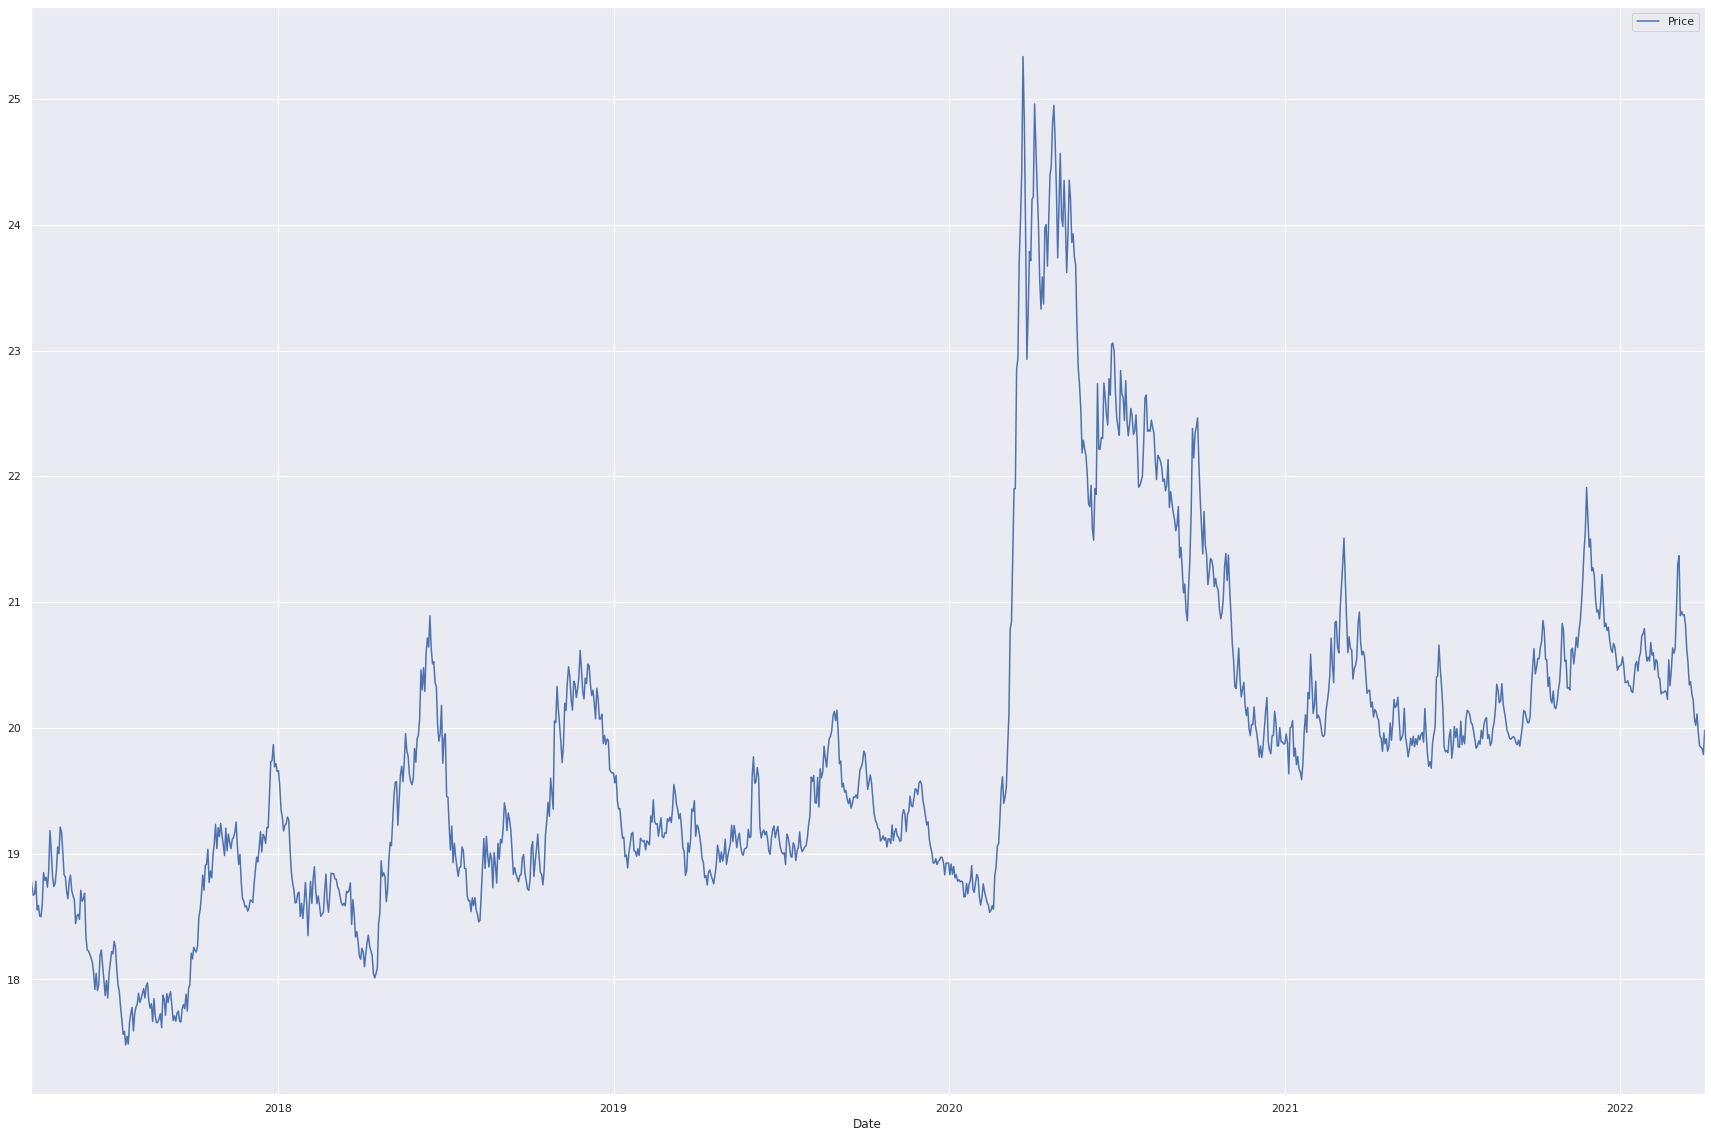

In [ ]:
fx.plot()
#No luce como serie estacionaria ya que no la media aparenta estar alejada de cero

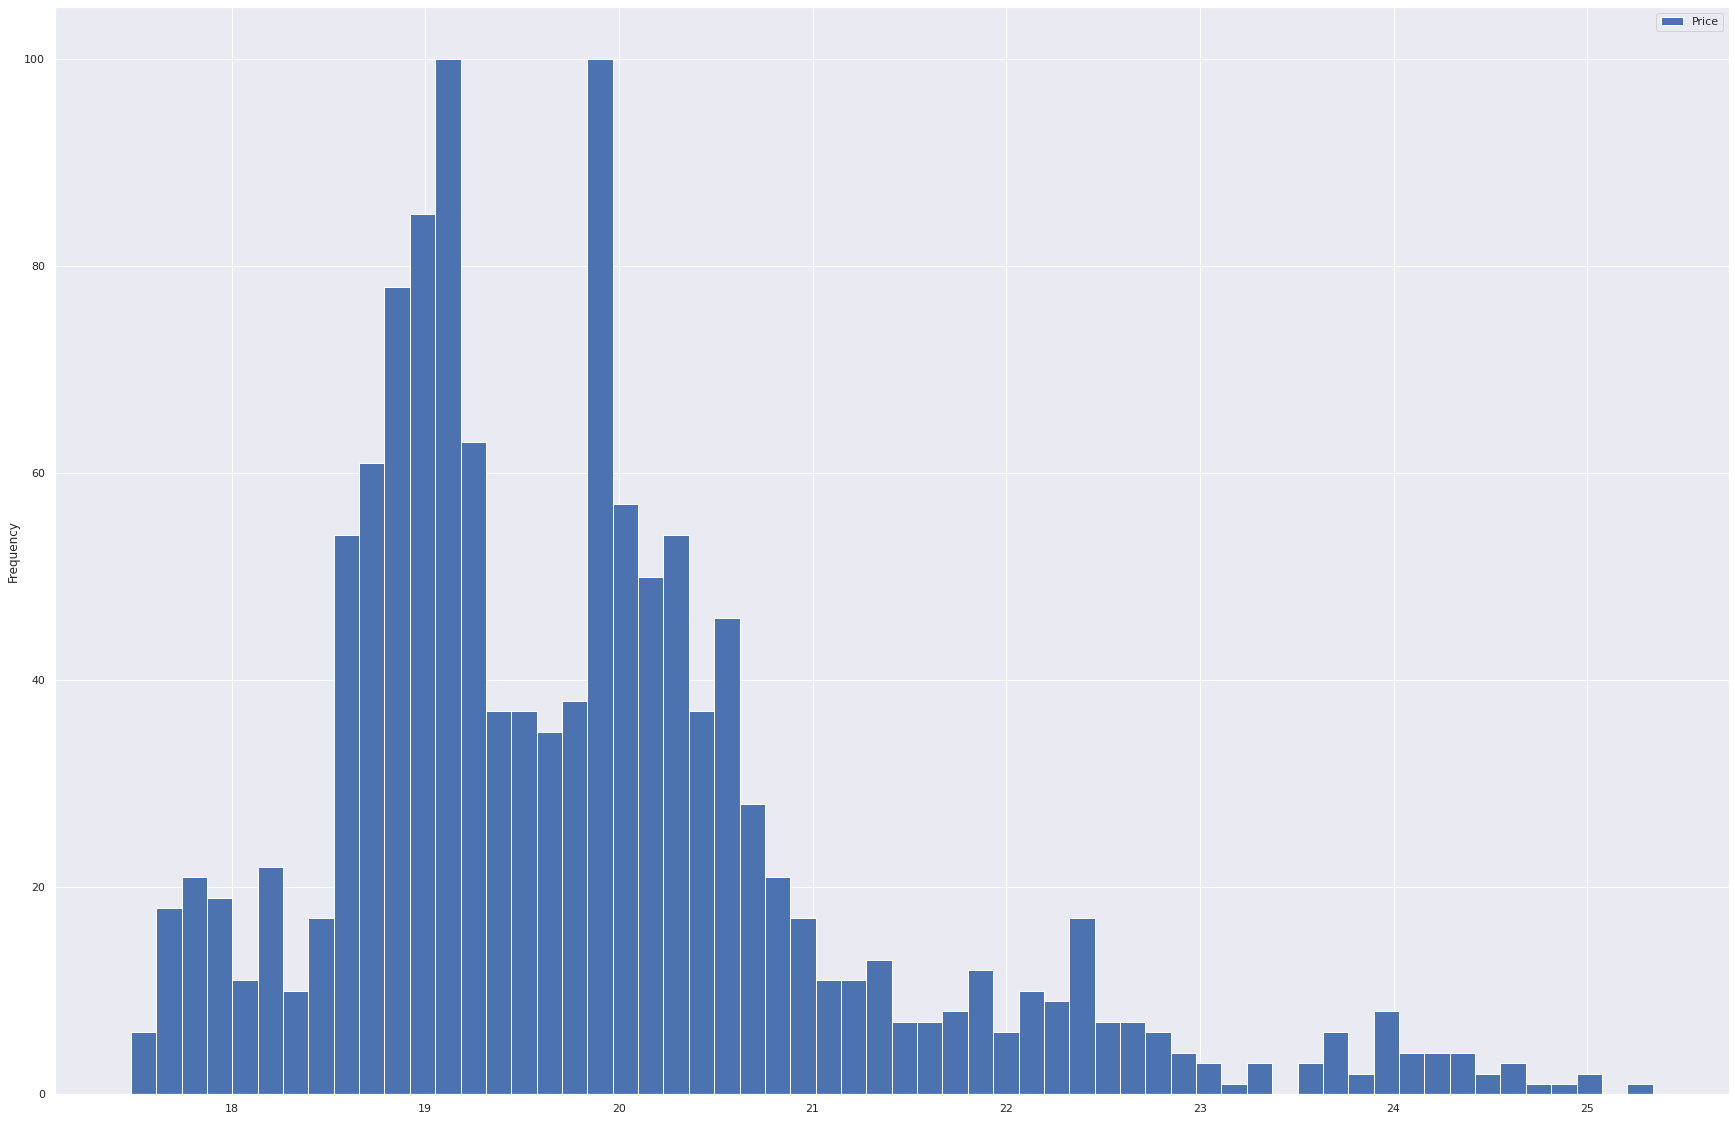

In [ ]:
fx.plot.hist(bins=60)
plt.show()
#No se observa una distribución normal

In [ ]:
#Prueba adfuller para comprovar si es estacionaria o no
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
p_value = adfuller(fx)[1]
print(p_value)
# El p-value está for encima de lo permitido para rechazar la hipótesis nula

0.070337863916678


In [ ]:
#Se Calculará un rendimiento logarítimoco para volver estacionaria la serie
fx['rtn_log'] = np.log(fx).diff()

In [ ]:
fx.head()

Price   rtn_log
Date                         
2017-04-05  18.8200       NaN
2017-04-06  18.7405 -0.004233
2017-04-07  18.6688 -0.003833
2017-04-10  18.6787  0.000530
2017-04-11  18.7813  0.005478

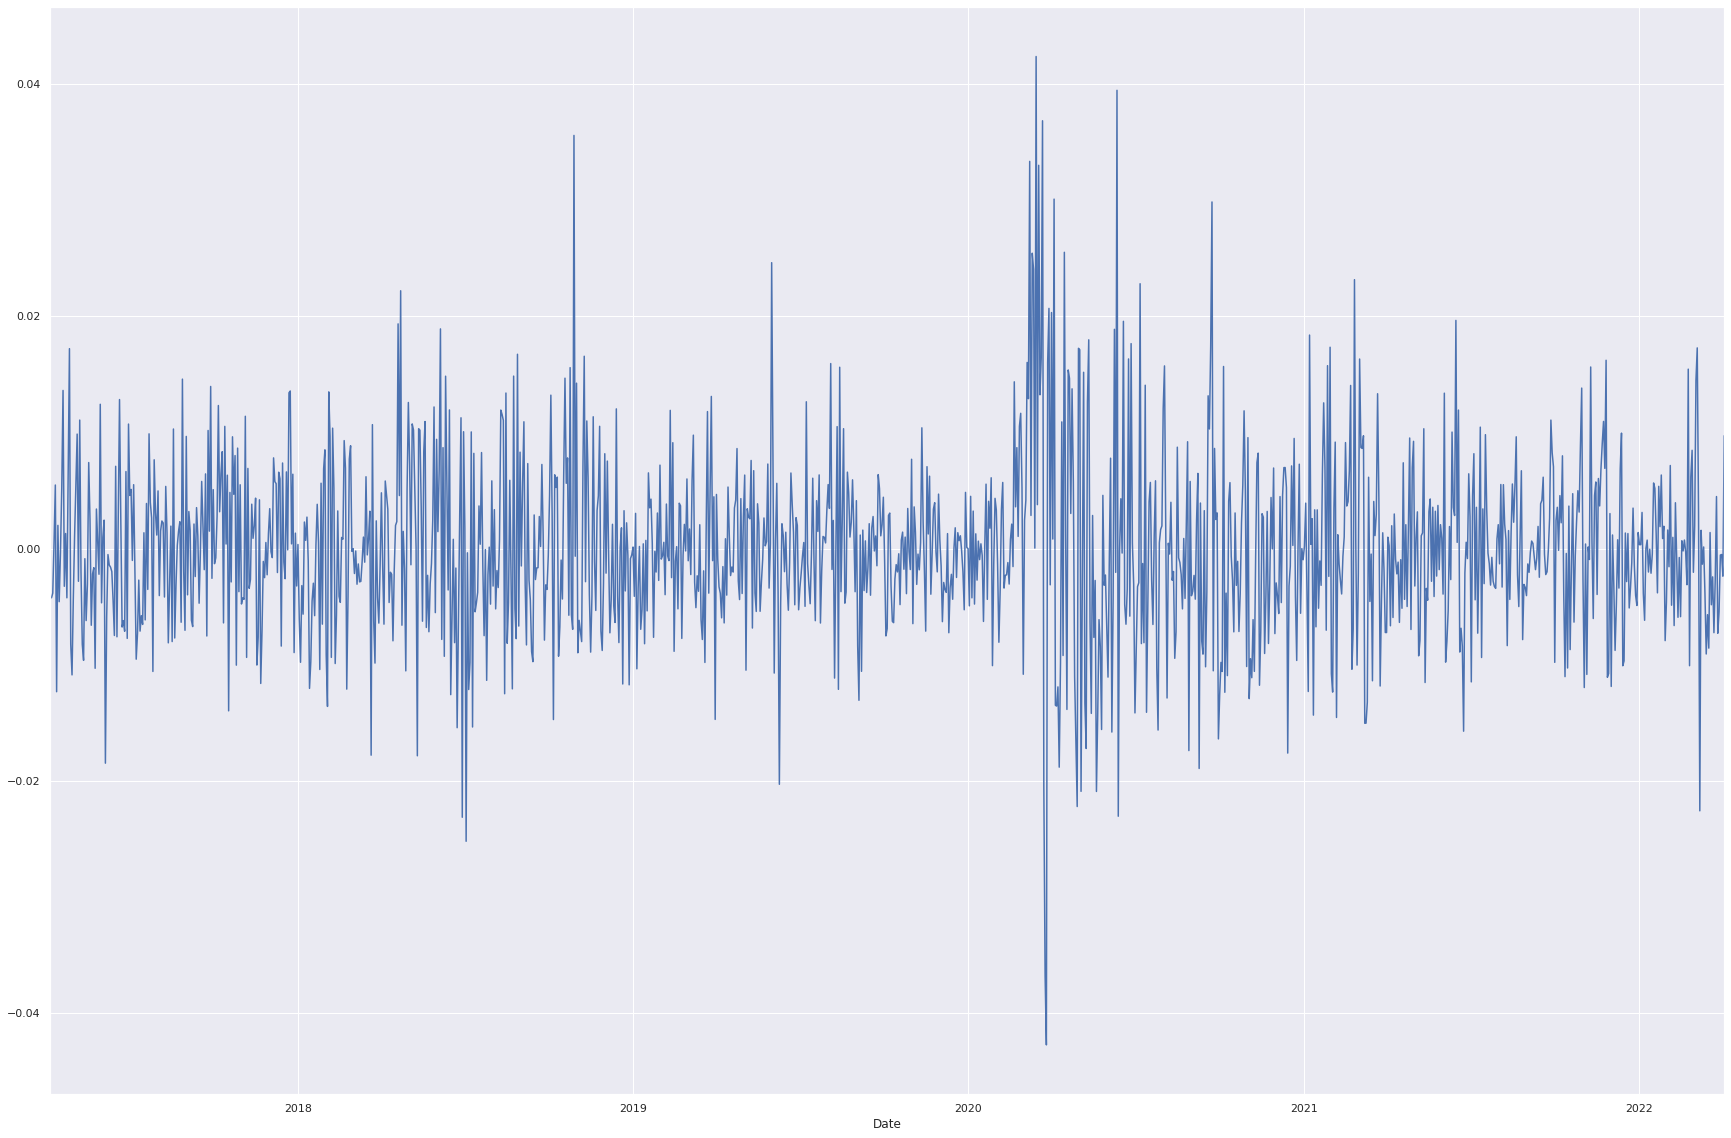

In [ ]:
fx['rtn_log'].plot()
#Luce cercano a cero el promedio

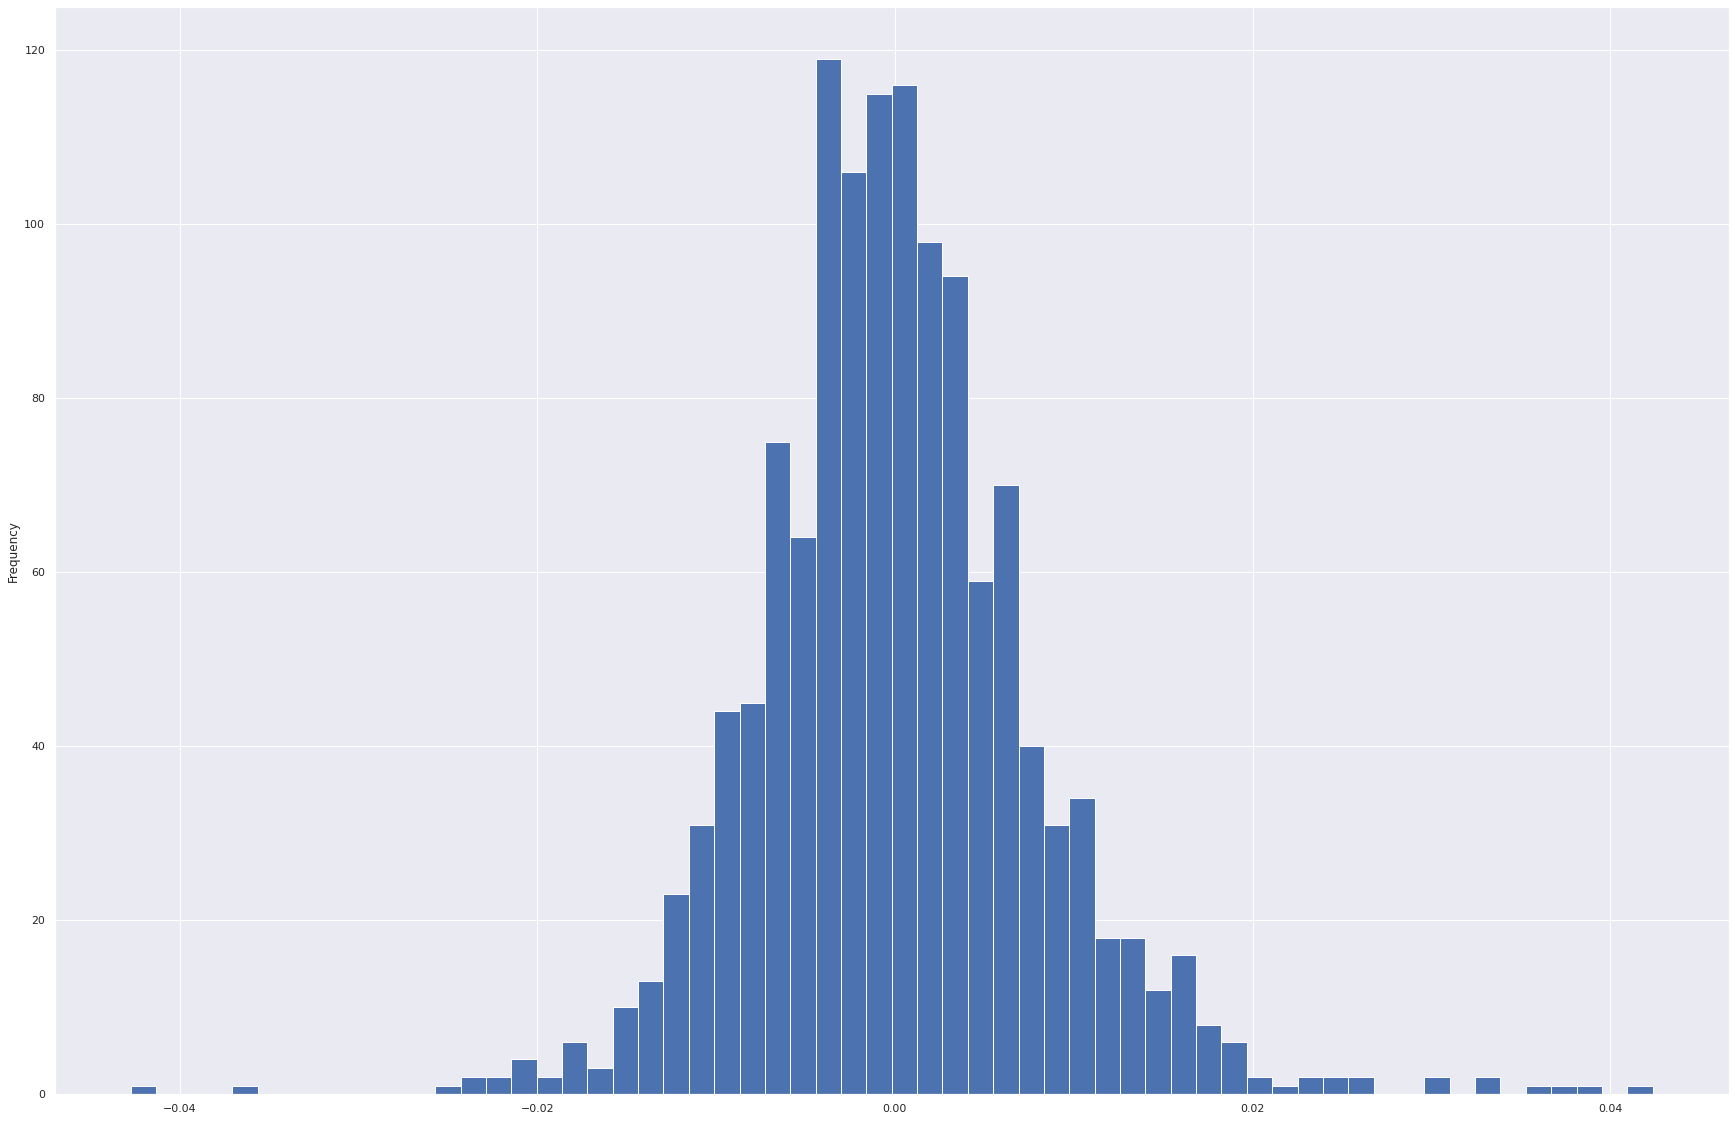

In [ ]:
fx['rtn_log'].plot.hist(bins=60)
plt.show()
#Se encuentra una distribución muy parecida a la normal

In [ ]:
#Prueba adfuller para comprovar si es estacionaria o no
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
p_value = adfuller(fx['rtn_log'][1:])[1]
print(p_value)
# El p-value está debajo de lo permitido para rechazar la hipótesis nula

1.9492035638011684e-15


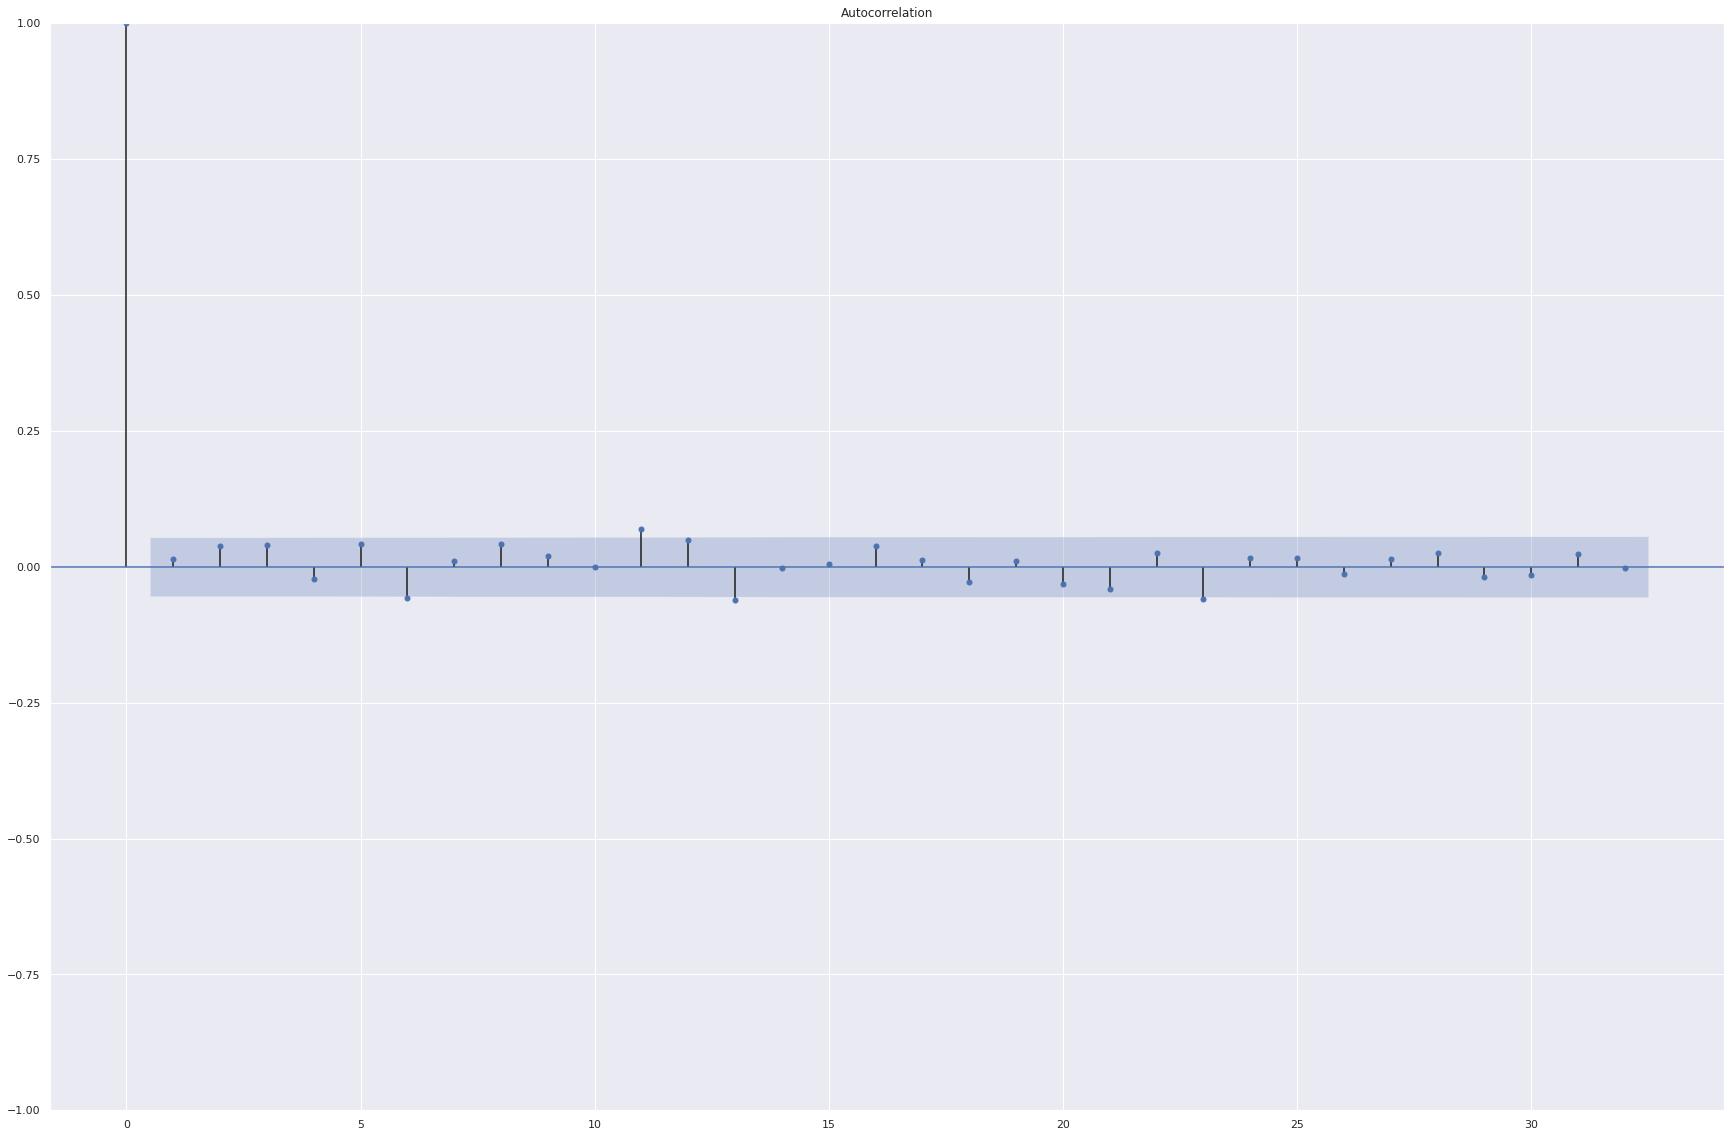

In [ ]:
plot_acf(fx['rtn_log'][1:])
plt.show()

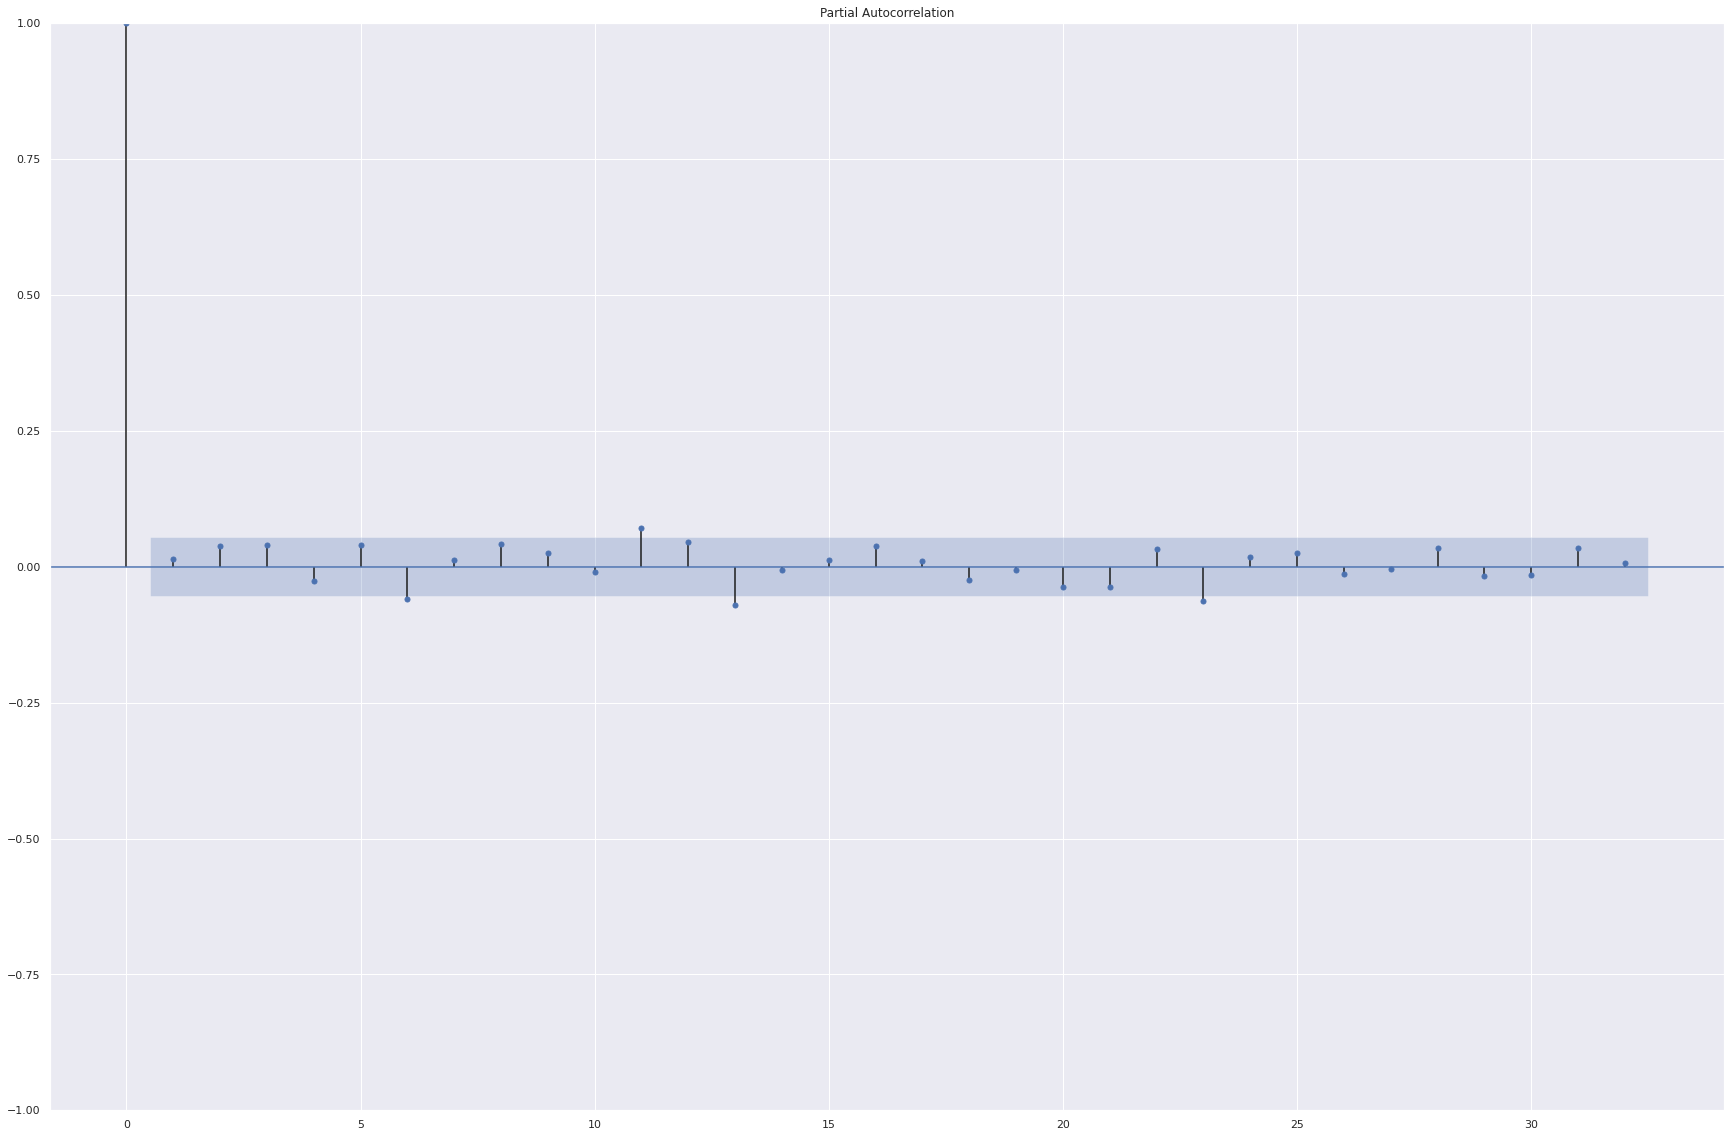

In [ ]:
plot_pacf(fx['rtn_log'][1:])
plt.show()

In [ ]:
f_l = Forecaster(y = fx['rtn_log'], current_dates=fx.index)


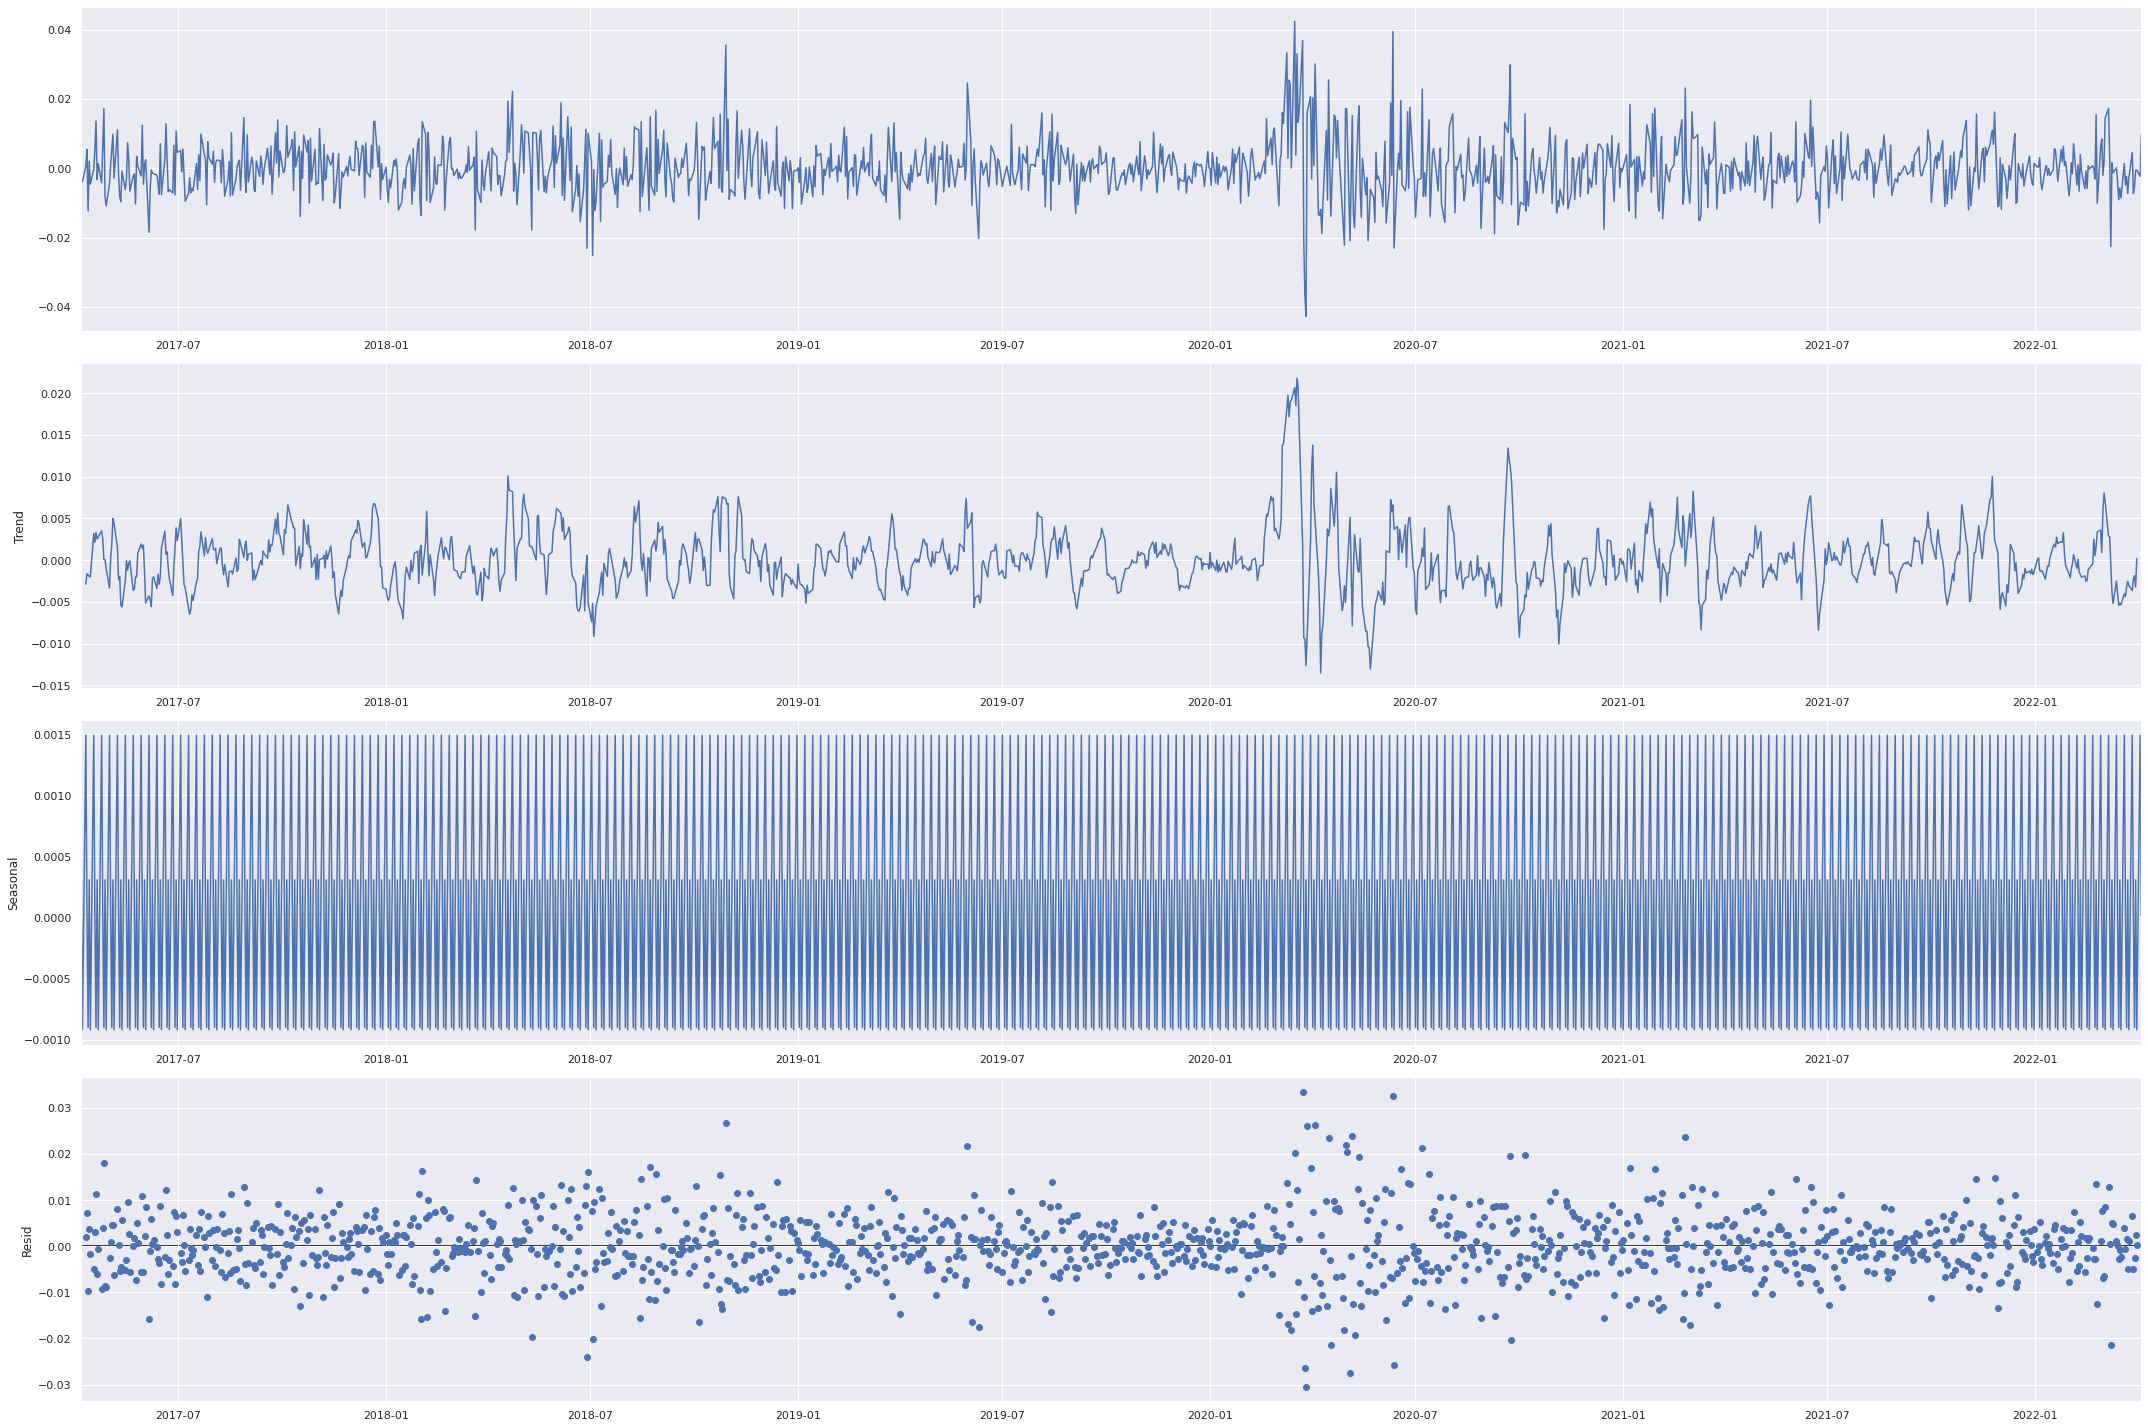

In [ ]:
f_l.seasonal_decompose().plot()
plt.show()

# Forecaster
Para utilizar Forectar se requiere:
- Especificar la longitud del test, en este caso los días que vamos a hacer el forecast para comparar con el real
- Especificar los días que haremos de predicción
- Elegir el modelo para hacer el forecast, en este caso LSTM

Ya que for default utiliza un escalador min-max pasarré al objeto f, que es la serie de FX en precio y no rendimiento

In [ ]:
f.set_test_length(12)       # 12 días para el test
f.generate_future_dates(12) # 12 días de predicción
f.set_estimator('lstm')     #  Red LSTM 

41/41 [==============================] - 2s 2ms/step - loss: 0.2719


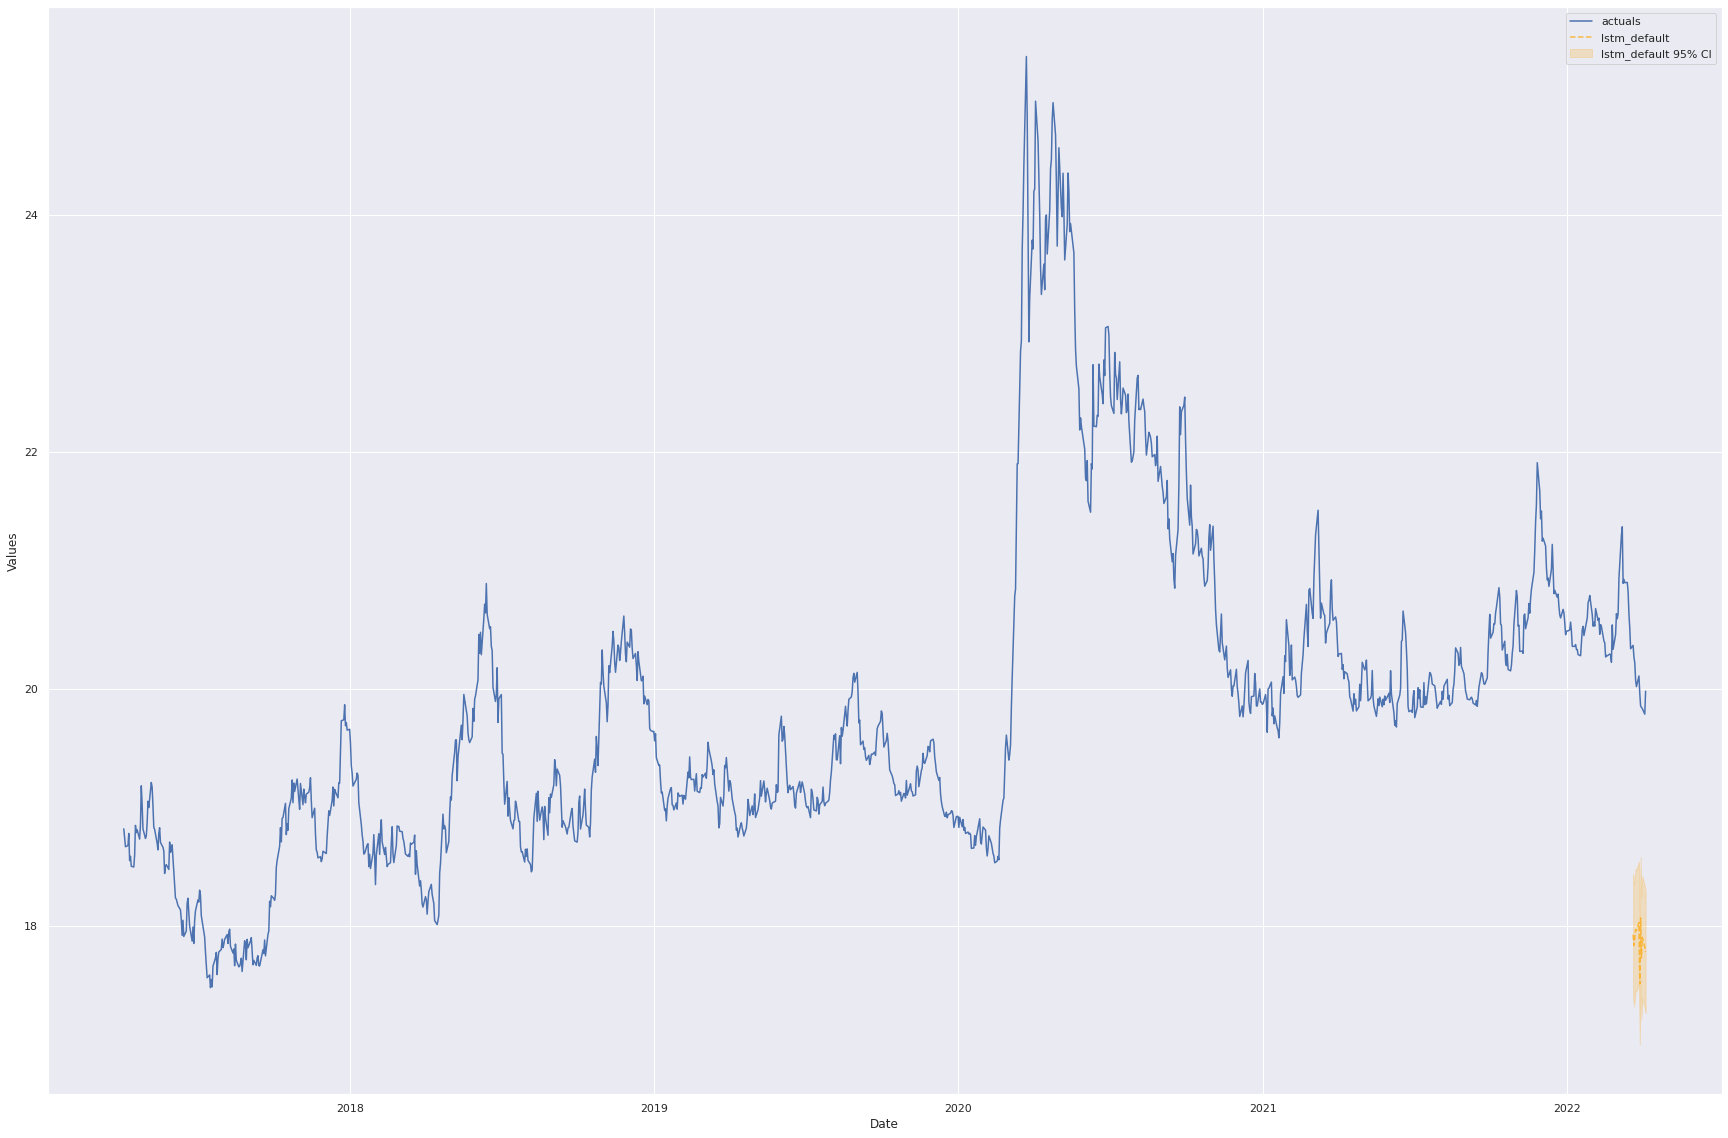

In [ ]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)
#Con los valores por default (input layer = 8, Adam como optimizador, 1 lag, learning rate = 0.001 sin dropout) de la LSTM el forcast del test parece estar muy alejado

41/41 [==============================] - 2s 2ms/step - loss: 0.2618


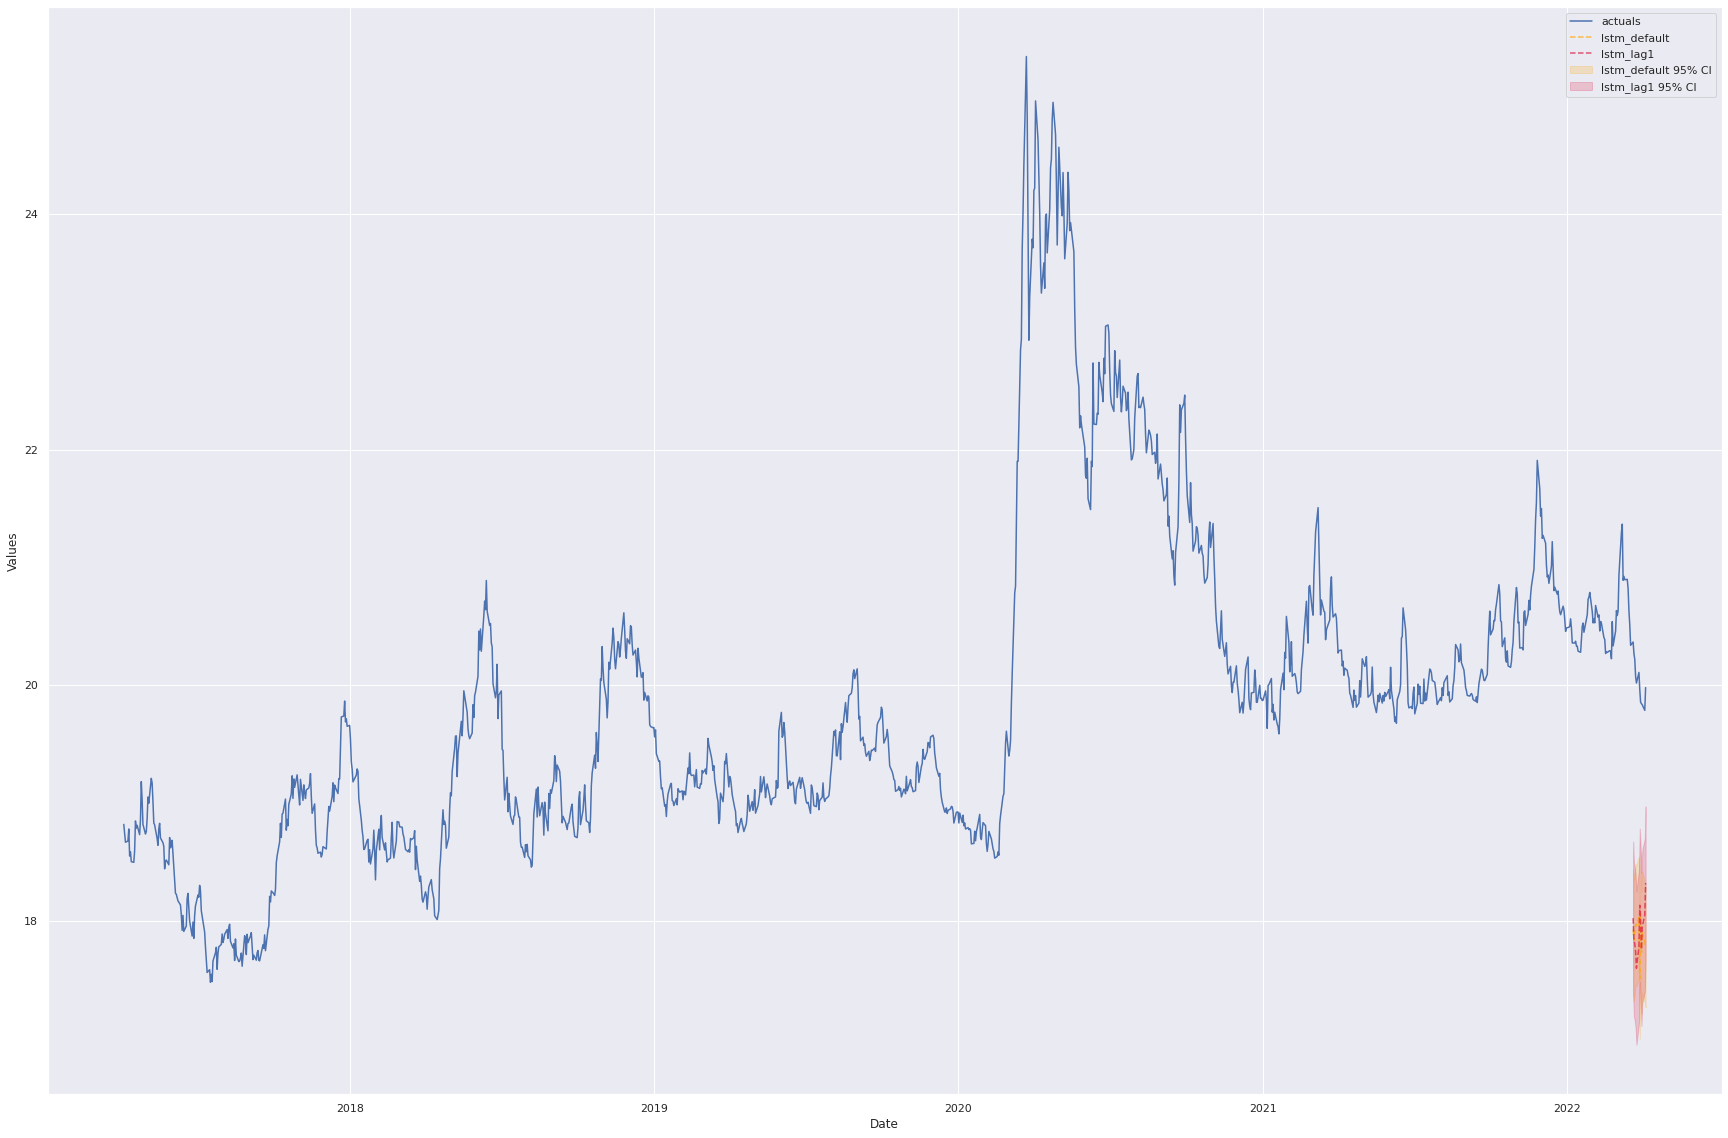

In [ ]:
f.manual_forecast(call_me='lstm_lag1', lags = 1)
f.plot_test_set(ci=True)

Epoch 1/5
32/32 [==============================] - 7s 53ms/step - loss: 0.2988 - val_loss: 0.0867
Epoch 2/5
32/32 [==============================] - 0s 13ms/step - loss: 0.1743 - val_loss: 0.1038
Epoch 3/5
32/32 [==============================] - 0s 13ms/step - loss: 0.1106 - val_loss: 0.0946
Epoch 4/5
32/32 [==============================] - 0s 13ms/step - loss: 0.0687 - val_loss: 0.0538
Epoch 5/5
32/32 [==============================] - 0s 13ms/step - loss: 0.0561 - val_loss: 0.0594
Epoch 1/5
33/33 [==============================] - 7s 50ms/step - loss: 0.2669 - val_loss: 0.1102
Epoch 2/5
33/33 [==============================] - 0s 13ms/step - loss: 0.1514 - val_loss: 0.1068
Epoch 3/5
33/33 [==============================] - 0s 13ms/step - loss: 0.0913 - val_loss: 0.0625
Epoch 4/5
33/33 [==============================] - 0s 13ms/step - loss: 0.0588 - val_loss: 0.0577
Epoch 5/5
33/33 [==============================] - 0s 13ms/step - loss: 0.0548 - val_loss: 0.0592


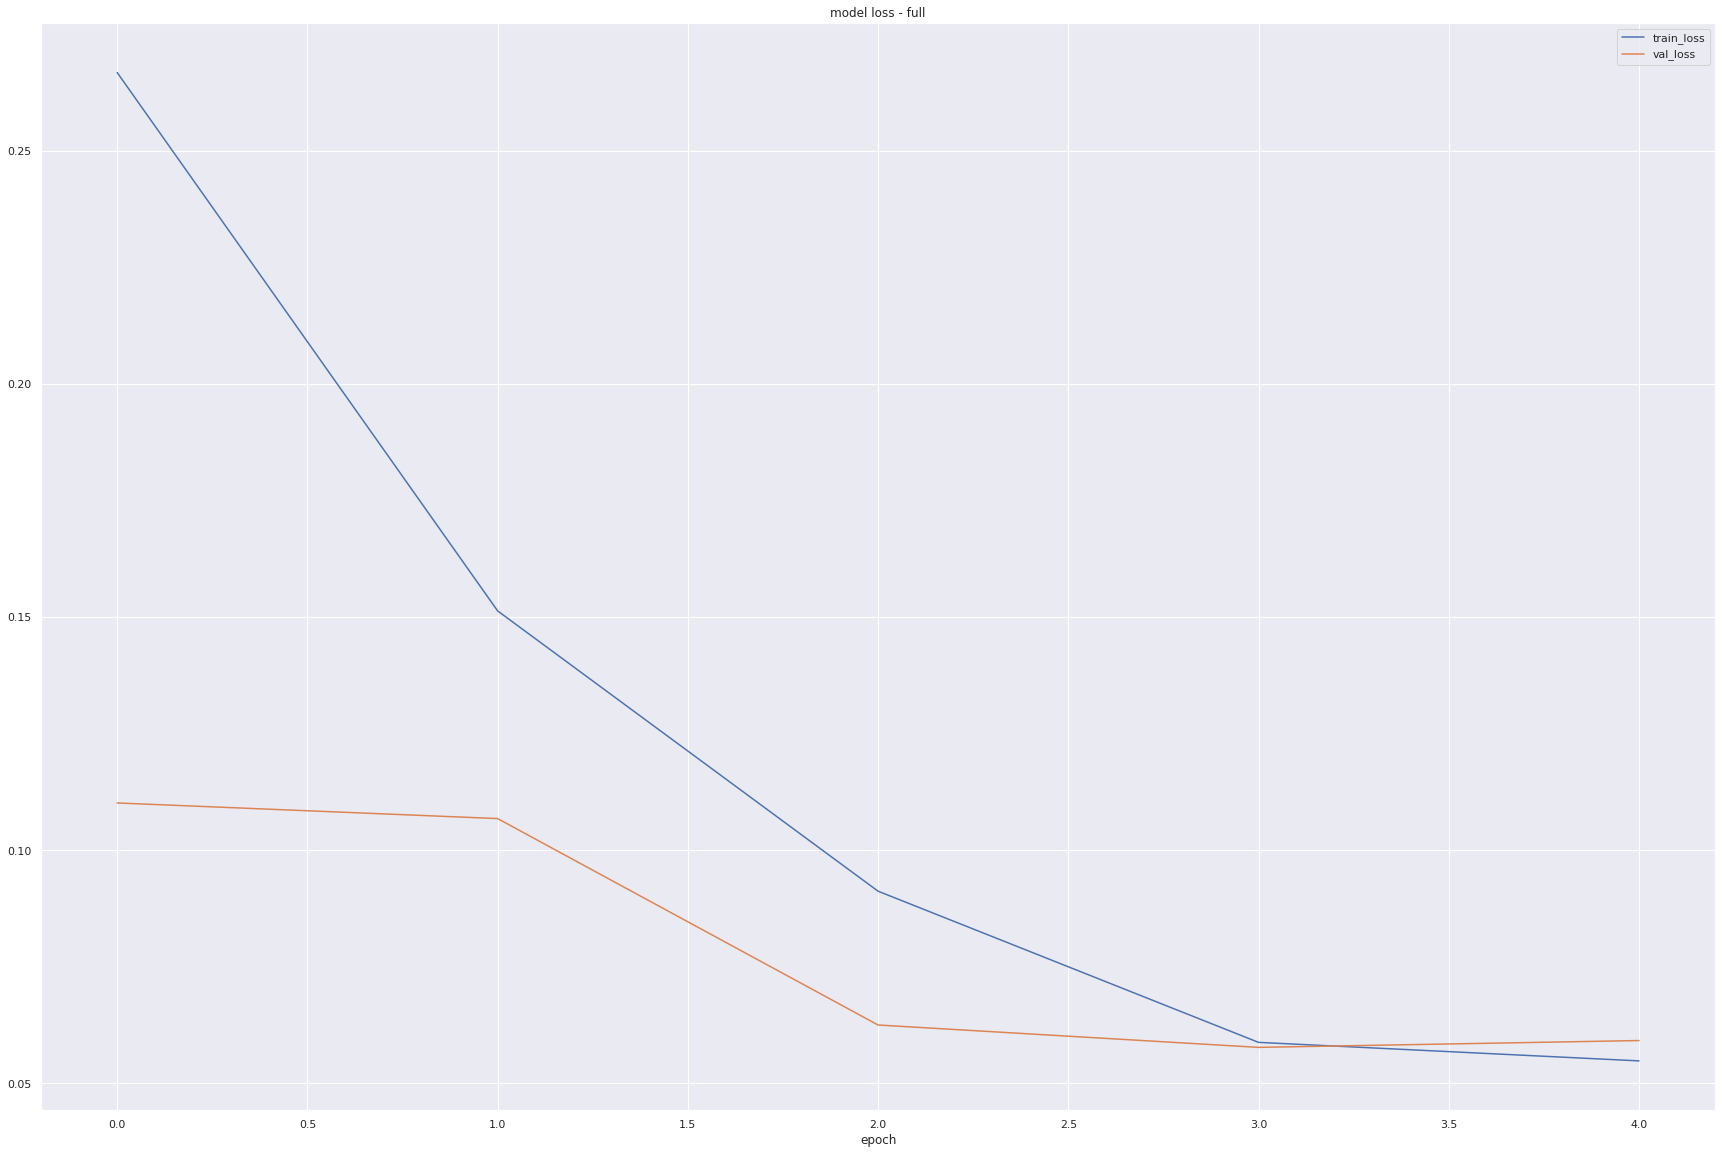

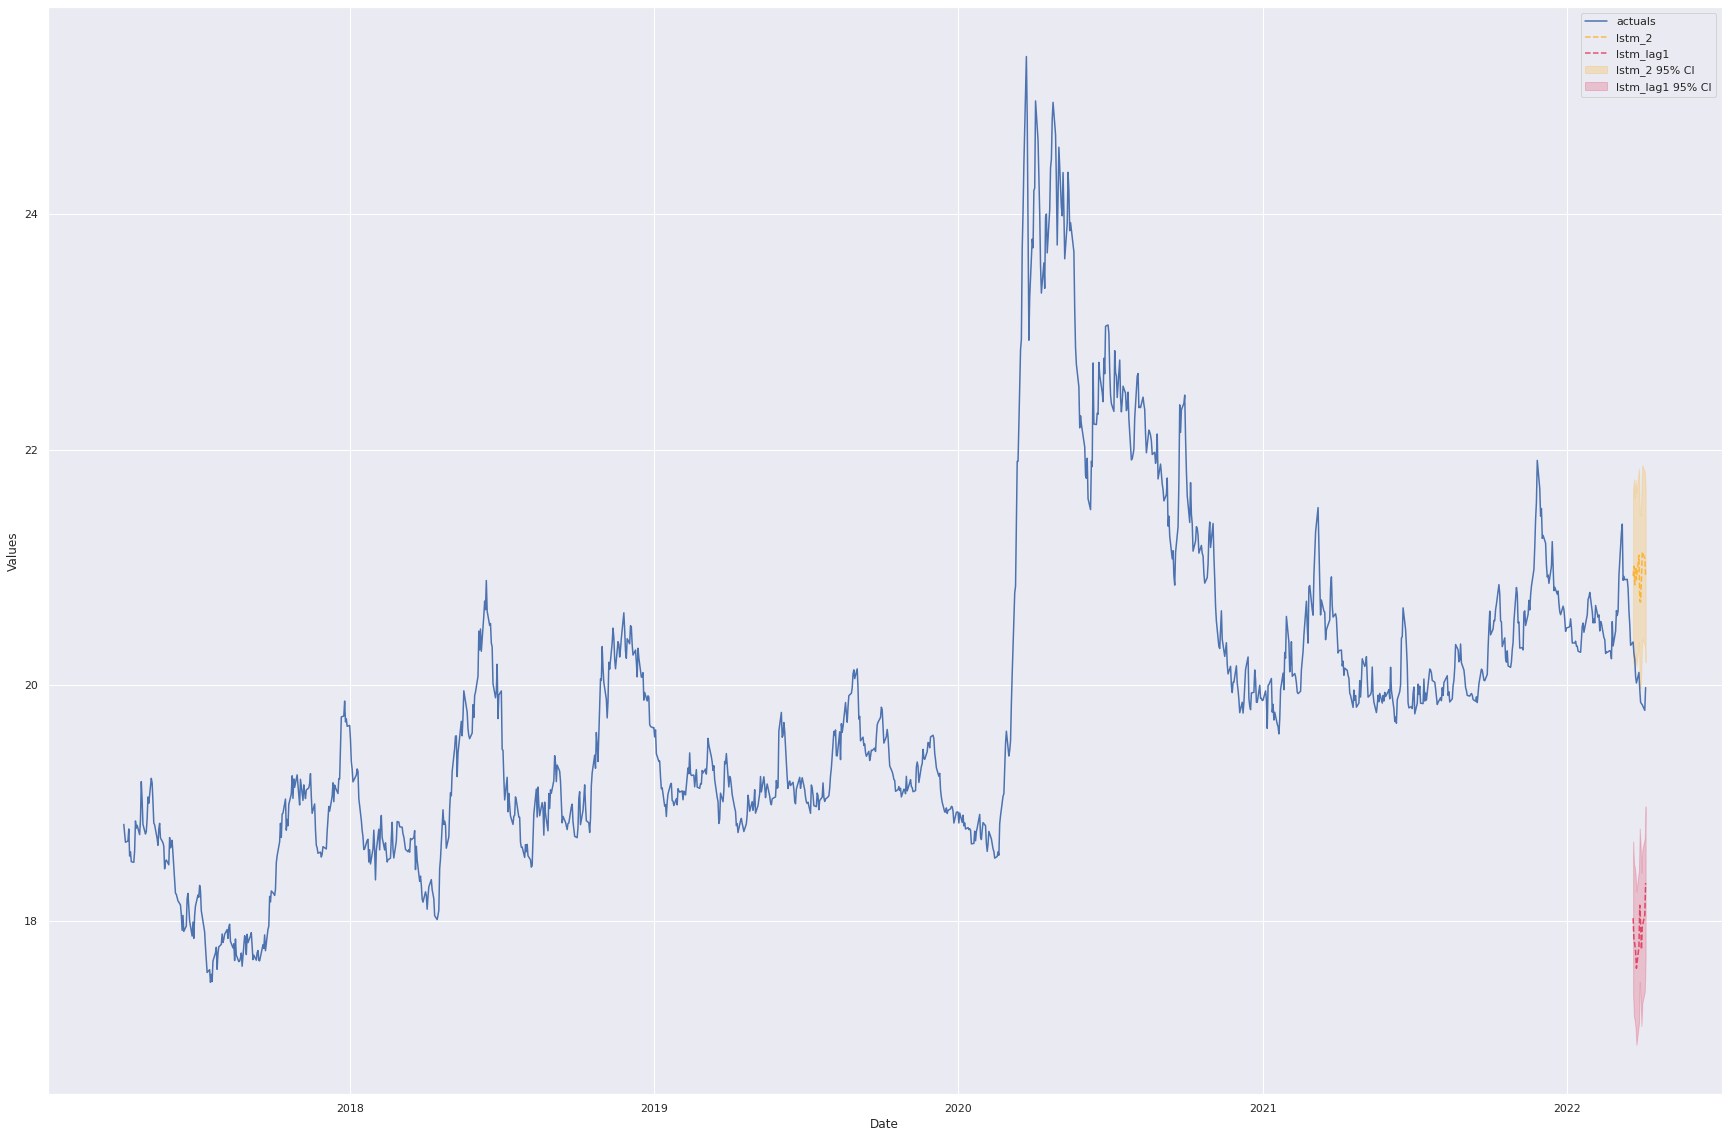

In [ ]:
f.manual_forecast(call_me='lstm_2',
                  lags=10,
                  batch_size=32,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(8,8,8),
                  dropout=(0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/30
32/32 [==============================] - 7s 52ms/step - loss: 0.2917 - val_loss: 0.1023
Epoch 2/30
32/32 [==============================] - 0s 13ms/step - loss: 0.1726 - val_loss: 0.1006
Epoch 3/30
32/32 [==============================] - 0s 13ms/step - loss: 0.1045 - val_loss: 0.0669
Epoch 4/30
32/32 [==============================] - 0s 12ms/step - loss: 0.0656 - val_loss: 0.0494
Epoch 5/30
32/32 [==============================] - 0s 13ms/step - loss: 0.0558 - val_loss: 0.0553
Epoch 6/30
32/32 [==============================] - 0s 13ms/step - loss: 0.0536 - val_loss: 0.0552
Epoch 7/30
32/32 [==============================] - 0s 14ms/step - loss: 0.0524 - val_loss: 0.0581
Epoch 8/30
32/32 [==============================] - 0s 13ms/step - loss: 0.0513 - val_loss: 0.0576
Epoch 9/30
32/32 [==============================] - 0s 13ms/step - loss: 0.0505 - val_loss: 0.0614
Epoch 1/30
33/33 [==============================] - 9s 77ms/step - loss: 0.2850 - val_loss: 0.0794
Epoch 2/30

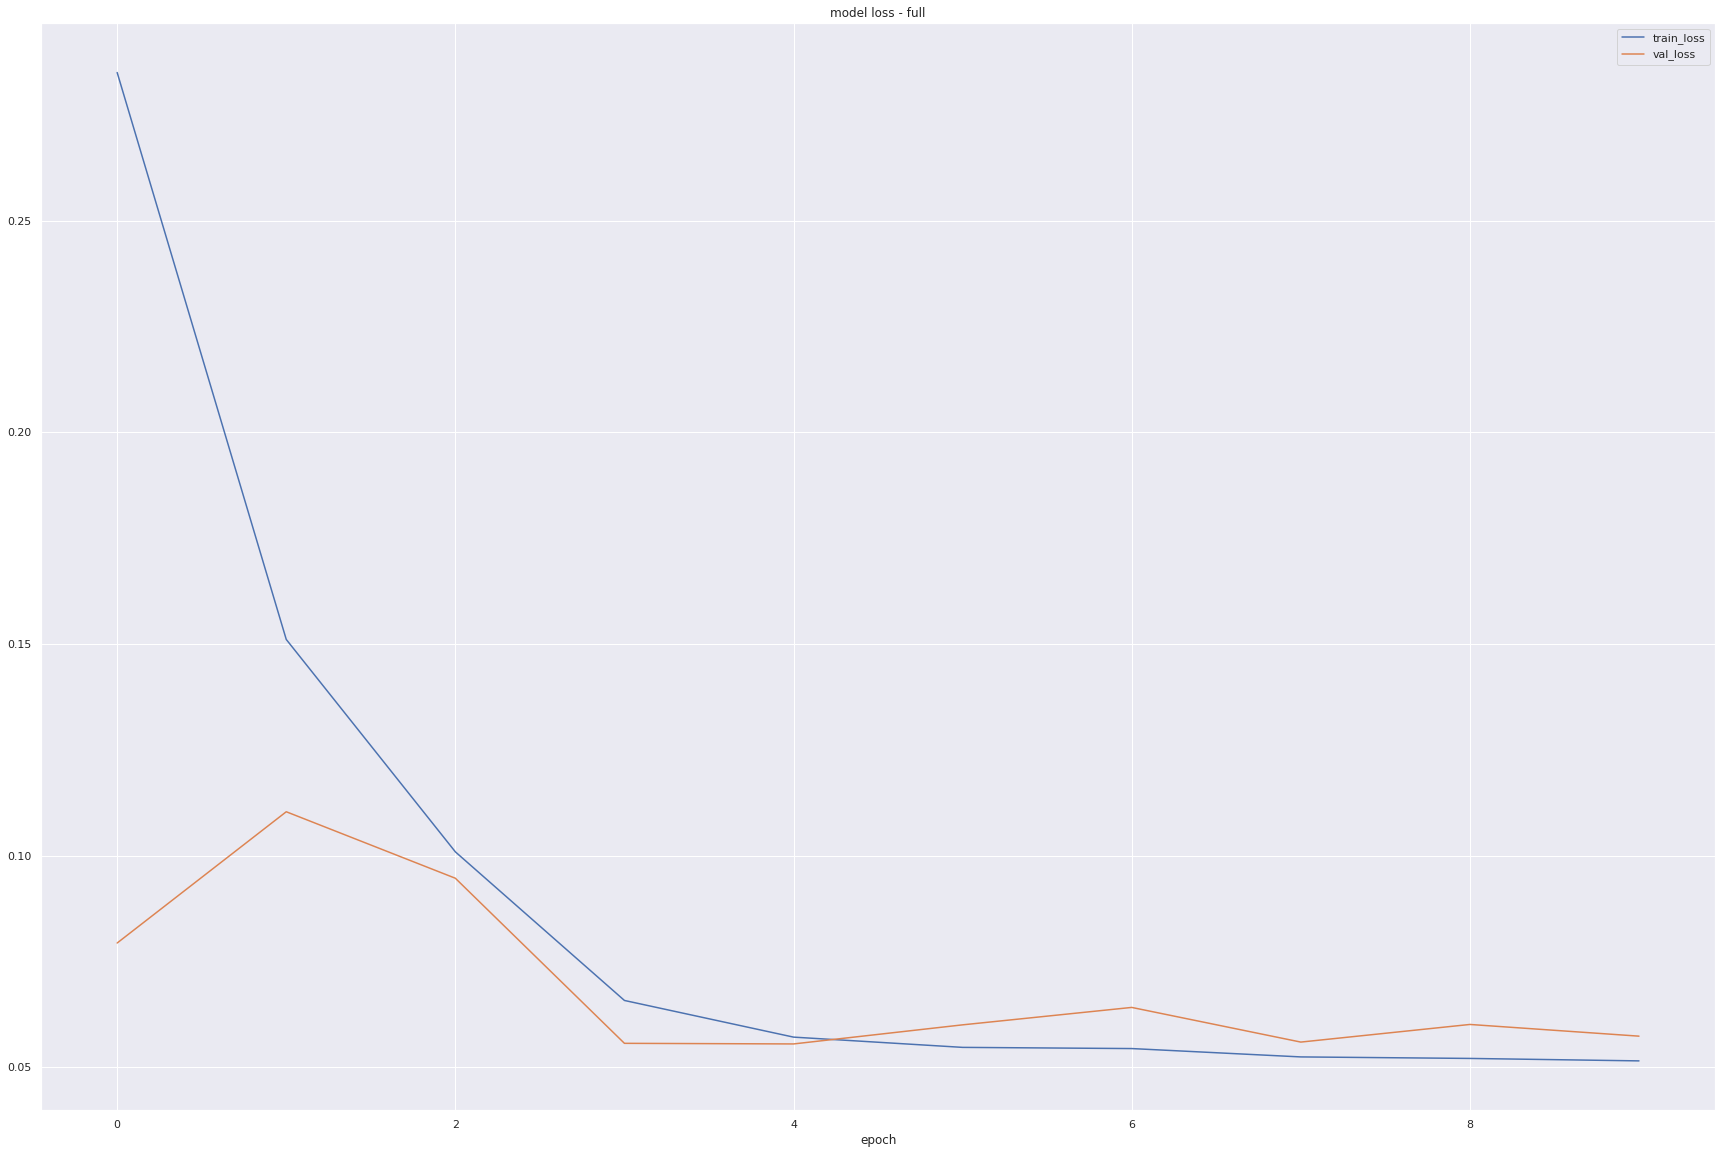

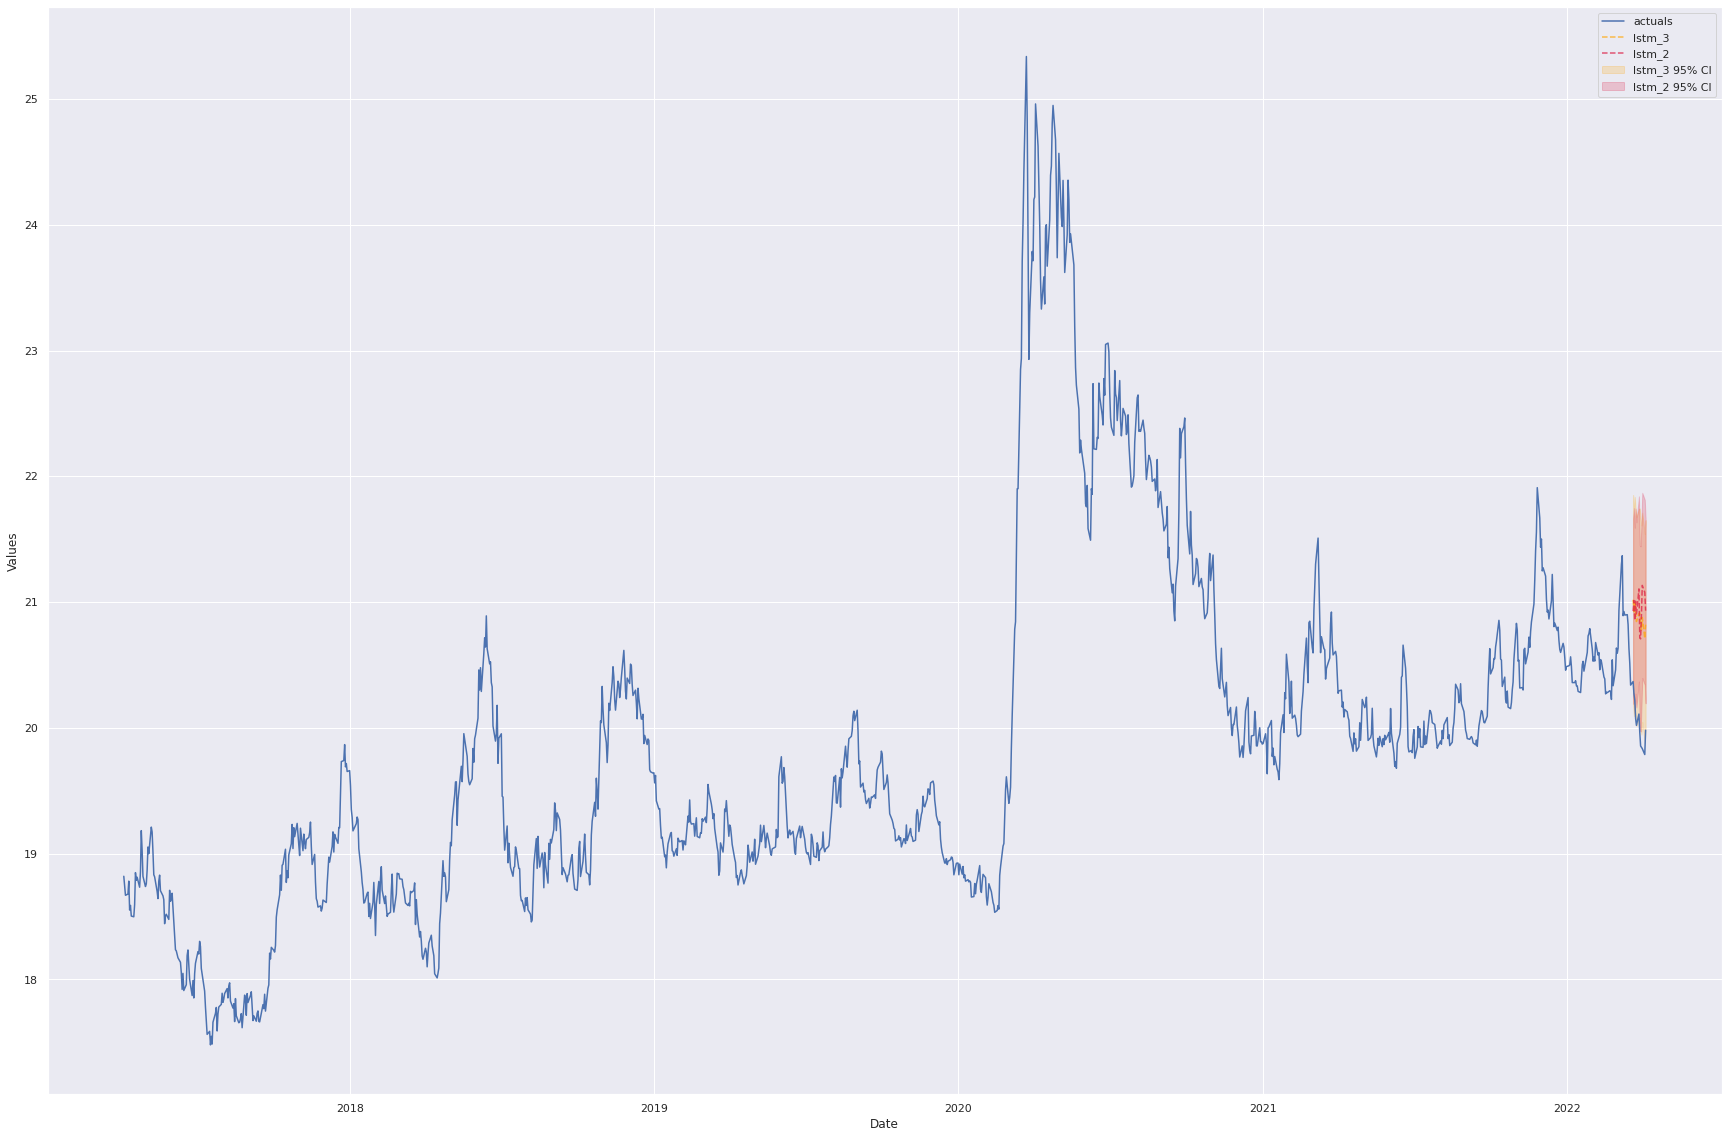

In [ ]:
f.manual_forecast(call_me='lstm_3',
                  lags=10,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(8,8,8),
                  dropout=(0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

Epoch 1/30
32/32 [==============================] - 6s 48ms/step - loss: 0.2855 - val_loss: 0.0836
Epoch 2/30
32/32 [==============================] - 0s 9ms/step - loss: 0.1341 - val_loss: 0.1256
Epoch 3/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0628 - val_loss: 0.0558
Epoch 4/30
32/32 [==============================] - 0s 10ms/step - loss: 0.0462 - val_loss: 0.0557
Epoch 5/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0454 - val_loss: 0.0519
Epoch 6/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0461 - val_loss: 0.0587
Epoch 7/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0448 - val_loss: 0.0526
Epoch 8/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0449 - val_loss: 0.0524
Epoch 9/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0442 - val_loss: 0.0521
Epoch 10/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0443 - val_loss: 0.0459
Epoch 11/30
32/32

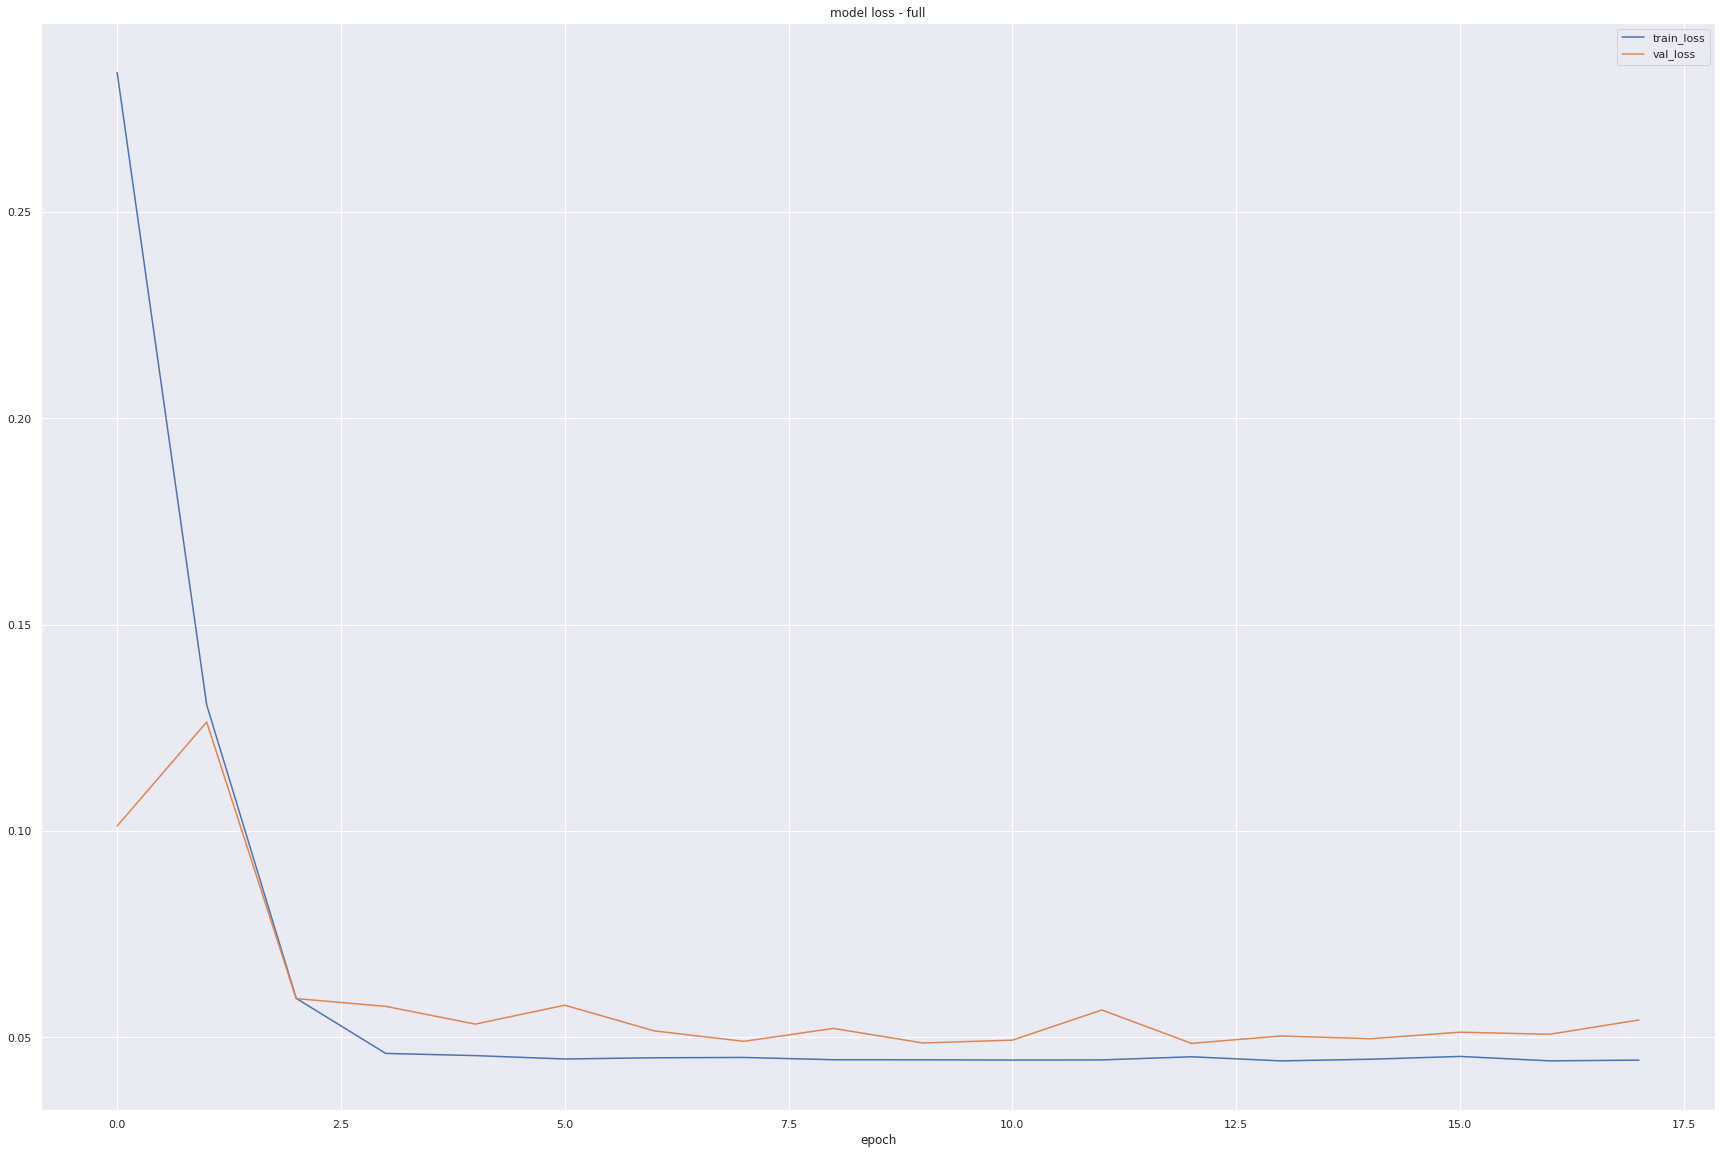

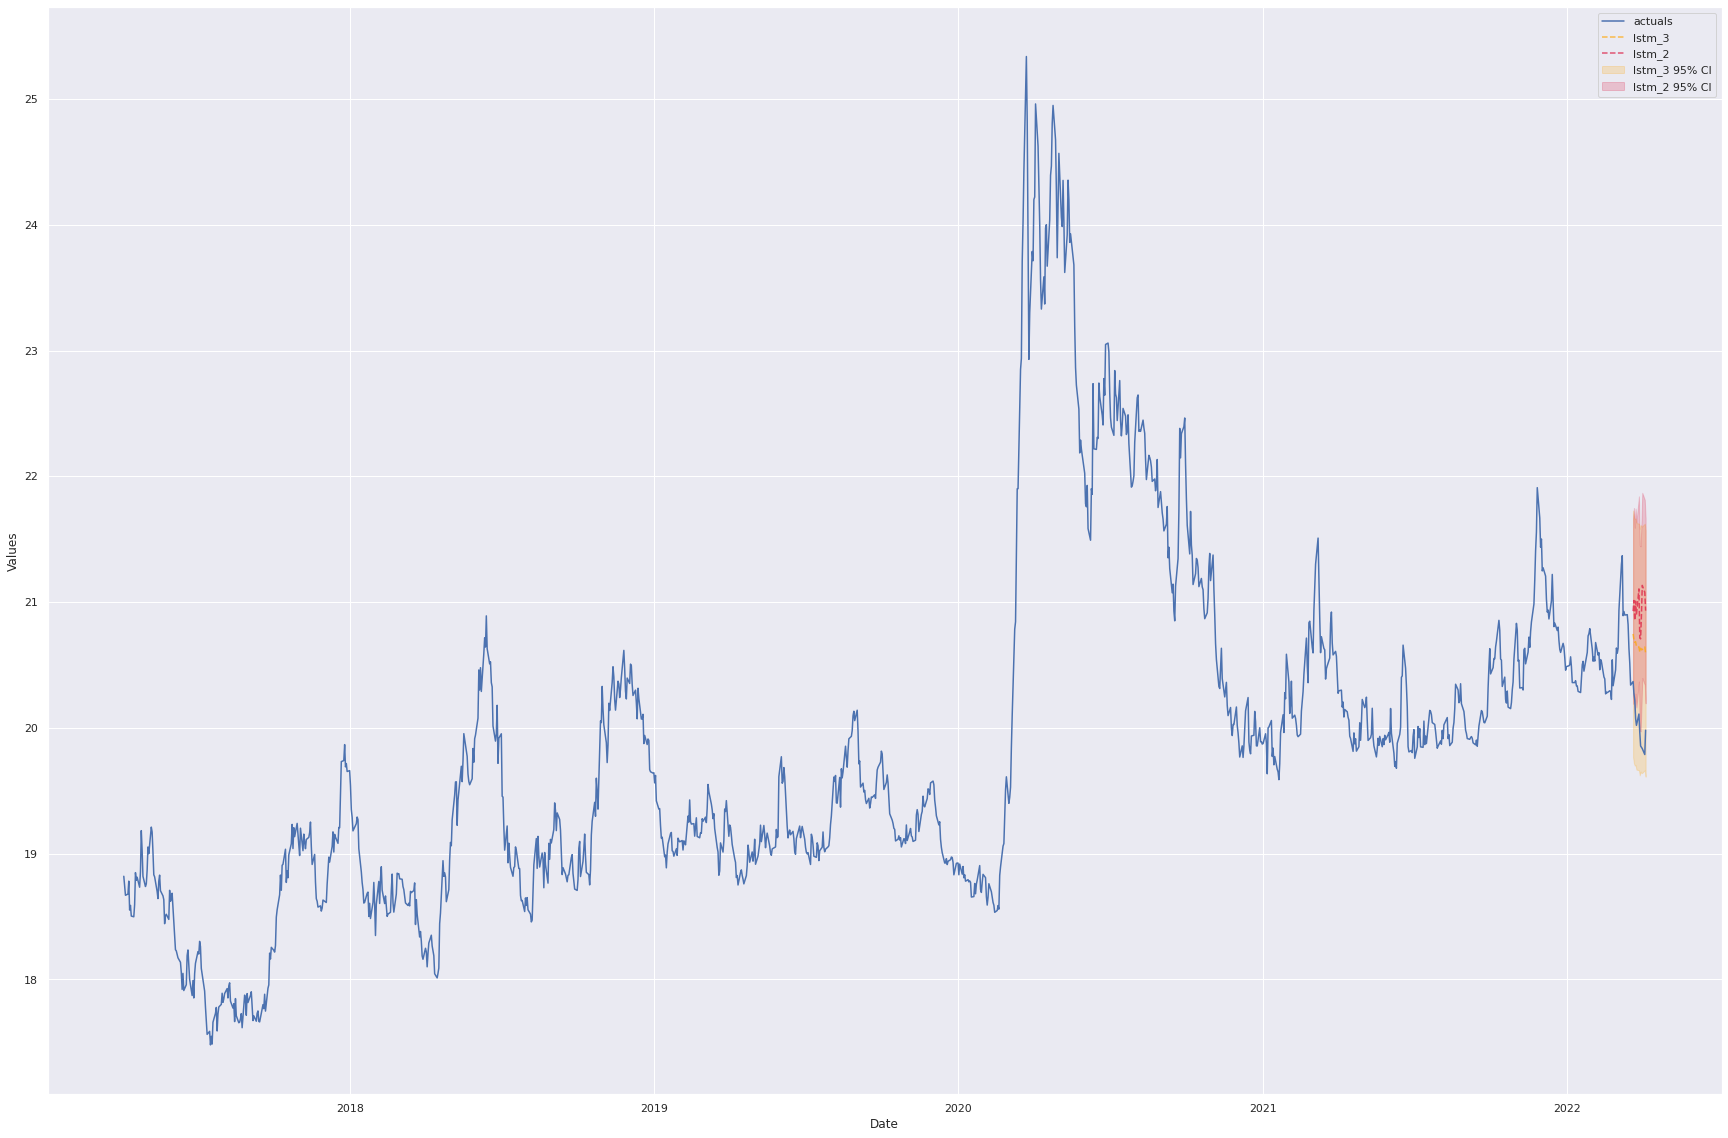

In [ ]:
f.manual_forecast(call_me='lstm_3',
                  lags=5,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

Epoch 1/30
32/32 [==============================] - 7s 44ms/step - loss: 0.3211 - val_loss: 0.0896
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2544 - val_loss: 0.0614
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1467 - val_loss: 0.1615
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1053 - val_loss: 0.1525
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0928 - val_loss: 0.1496
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0795 - val_loss: 0.1172
Epoch 7/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0882
Epoch 1/30
33/33 [==============================] - 6s 44ms/step - loss: 0.3207 - val_loss: 0.0862
Epoch 2/30
33/33 [==============================] - 0s 5ms/step - loss: 0.2491 - val_loss: 0.0634
Epoch 3/30
33/33 [==============================] - 0s 5ms/step - loss: 0.1408 - val_loss: 0.1683
Epoch 4/30
33/33 [

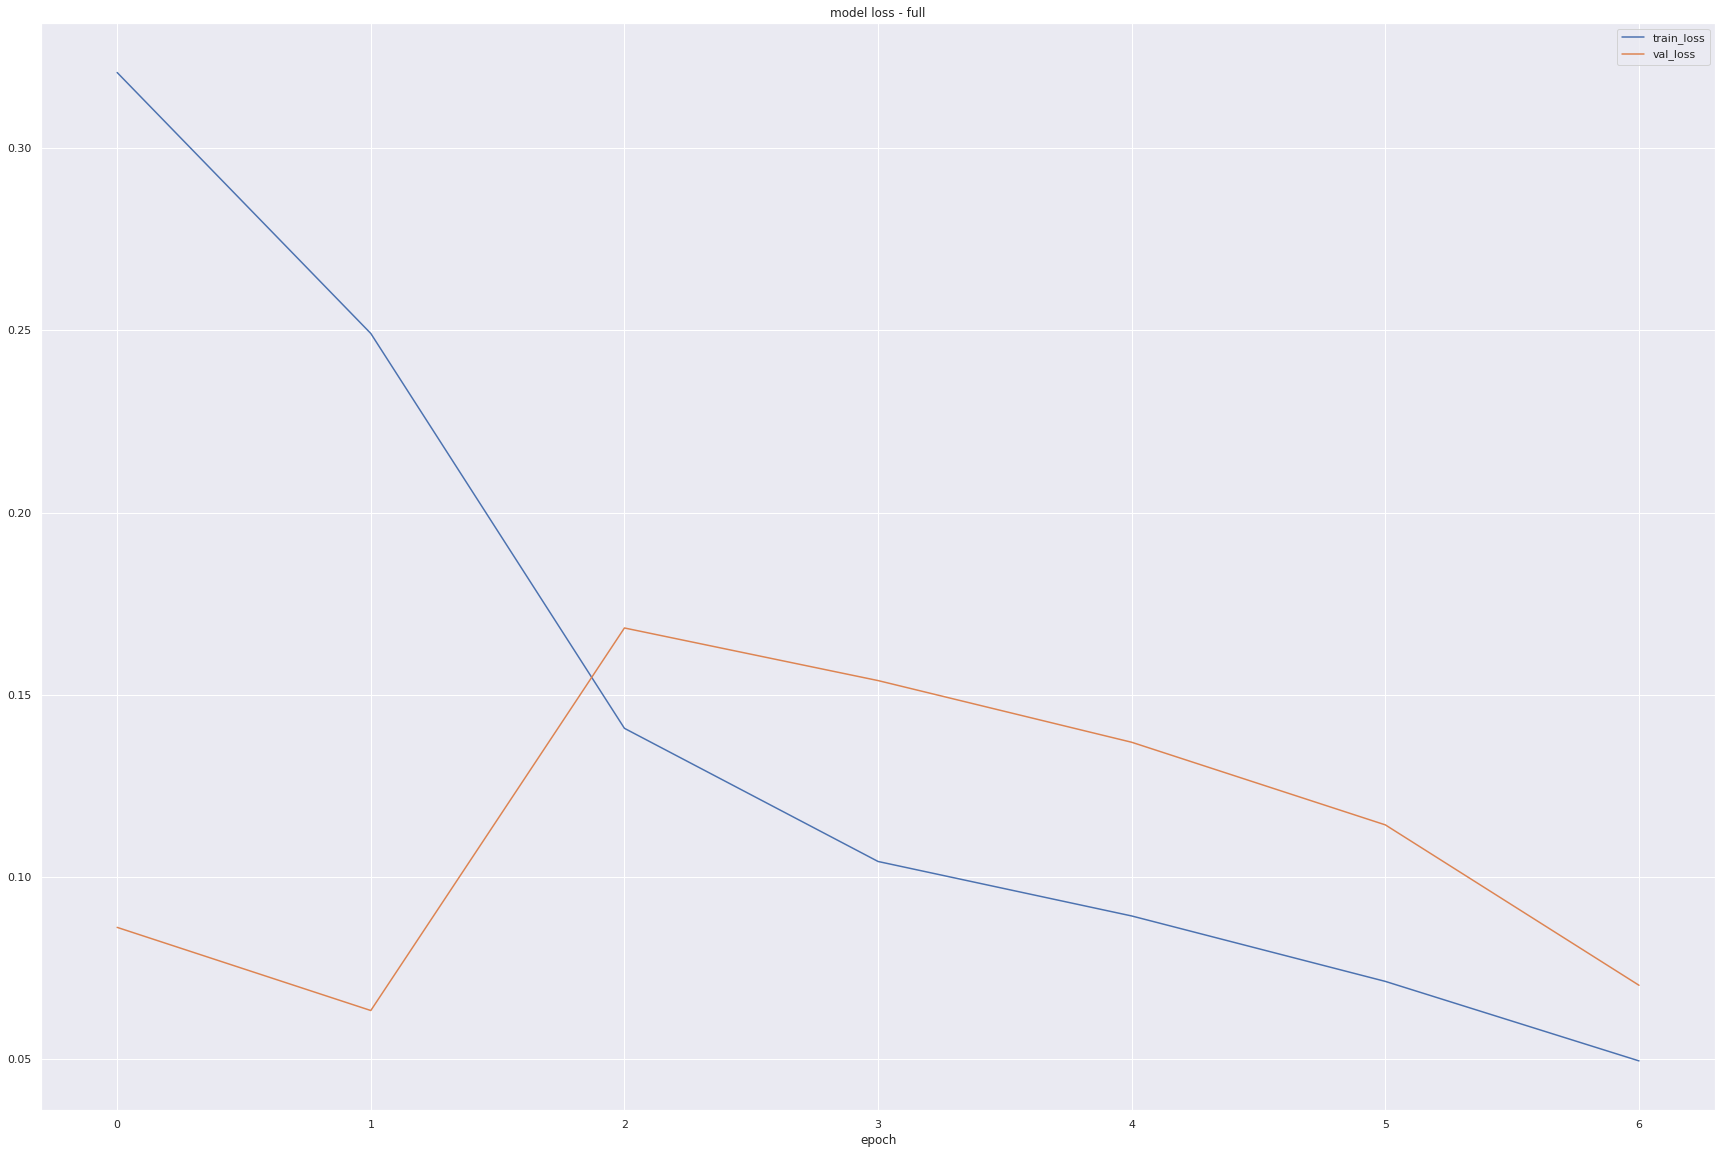

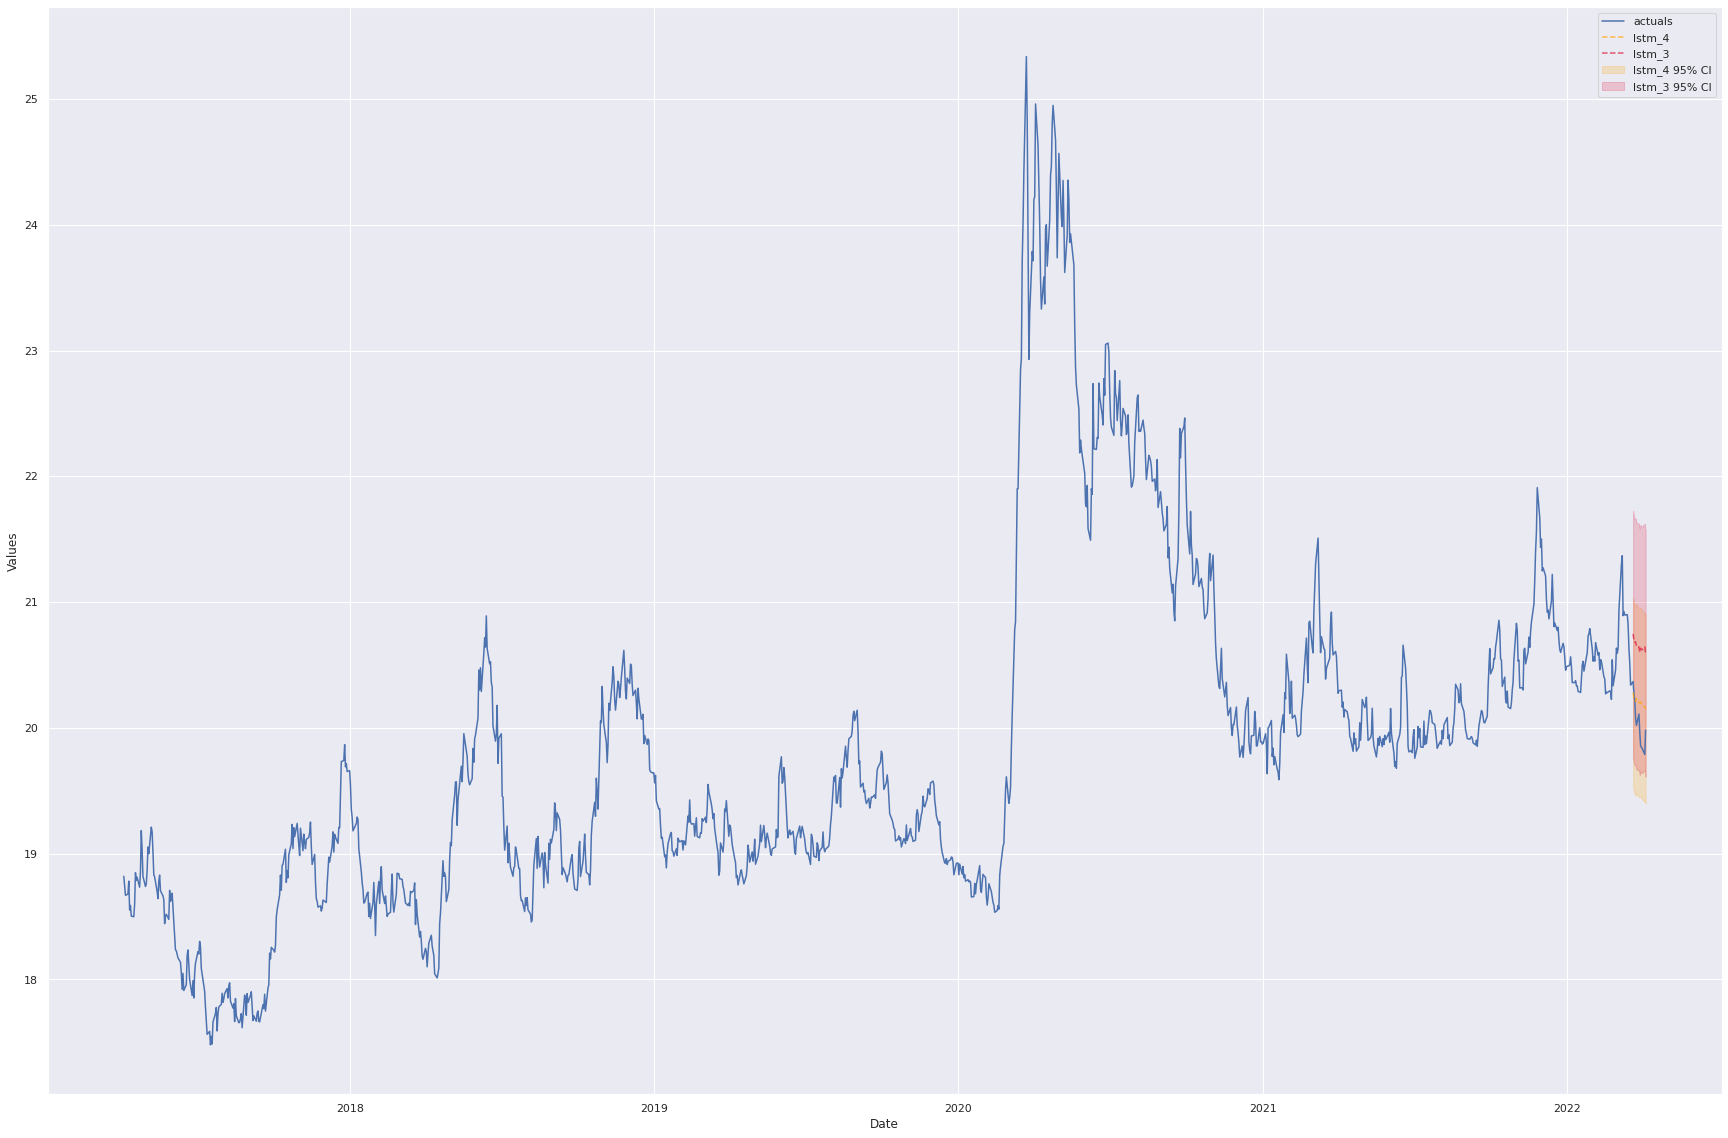

In [ ]:
f.manual_forecast(call_me='lstm_4',
                  lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [ ]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_4          0.009999          0.236074       -0.738573   
1        lstm_3          0.031203          0.640797      -11.809660   
2        lstm_2          0.045590          0.937549      -26.421022   
3     lstm_lag1          0.105368          2.131188     -140.690165   
4  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False

Epoch 1/30
32/32 [==============================] - 7s 56ms/step - loss: 0.3187 - val_loss: 0.0852
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 0.2287 - val_loss: 0.1049
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1249 - val_loss: 0.1551
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1015 - val_loss: 0.1491
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0818 - val_loss: 0.1242
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0510 - val_loss: 0.0647
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0429 - val_loss: 0.0631
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0415 - val_loss: 0.0648
Epoch 9/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.0561
Epoch 10/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.0568
Epoch 11/30
32/32 

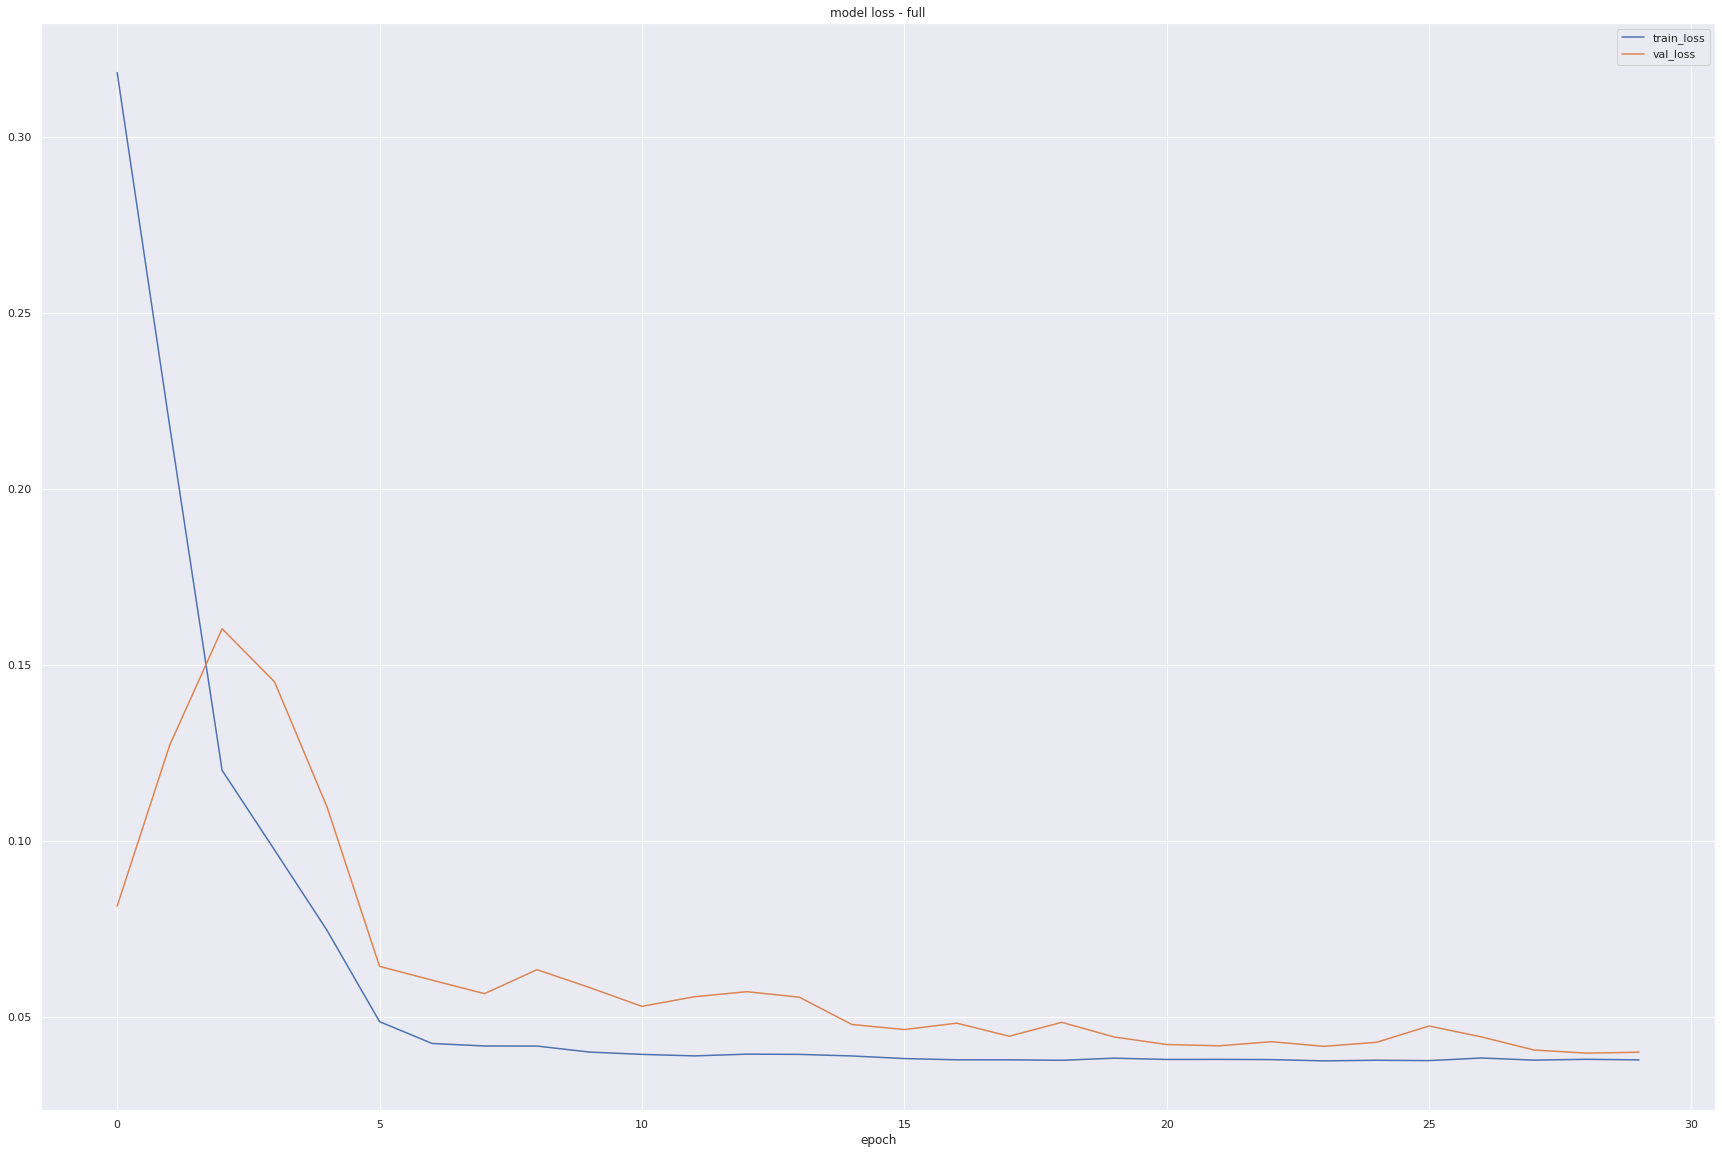

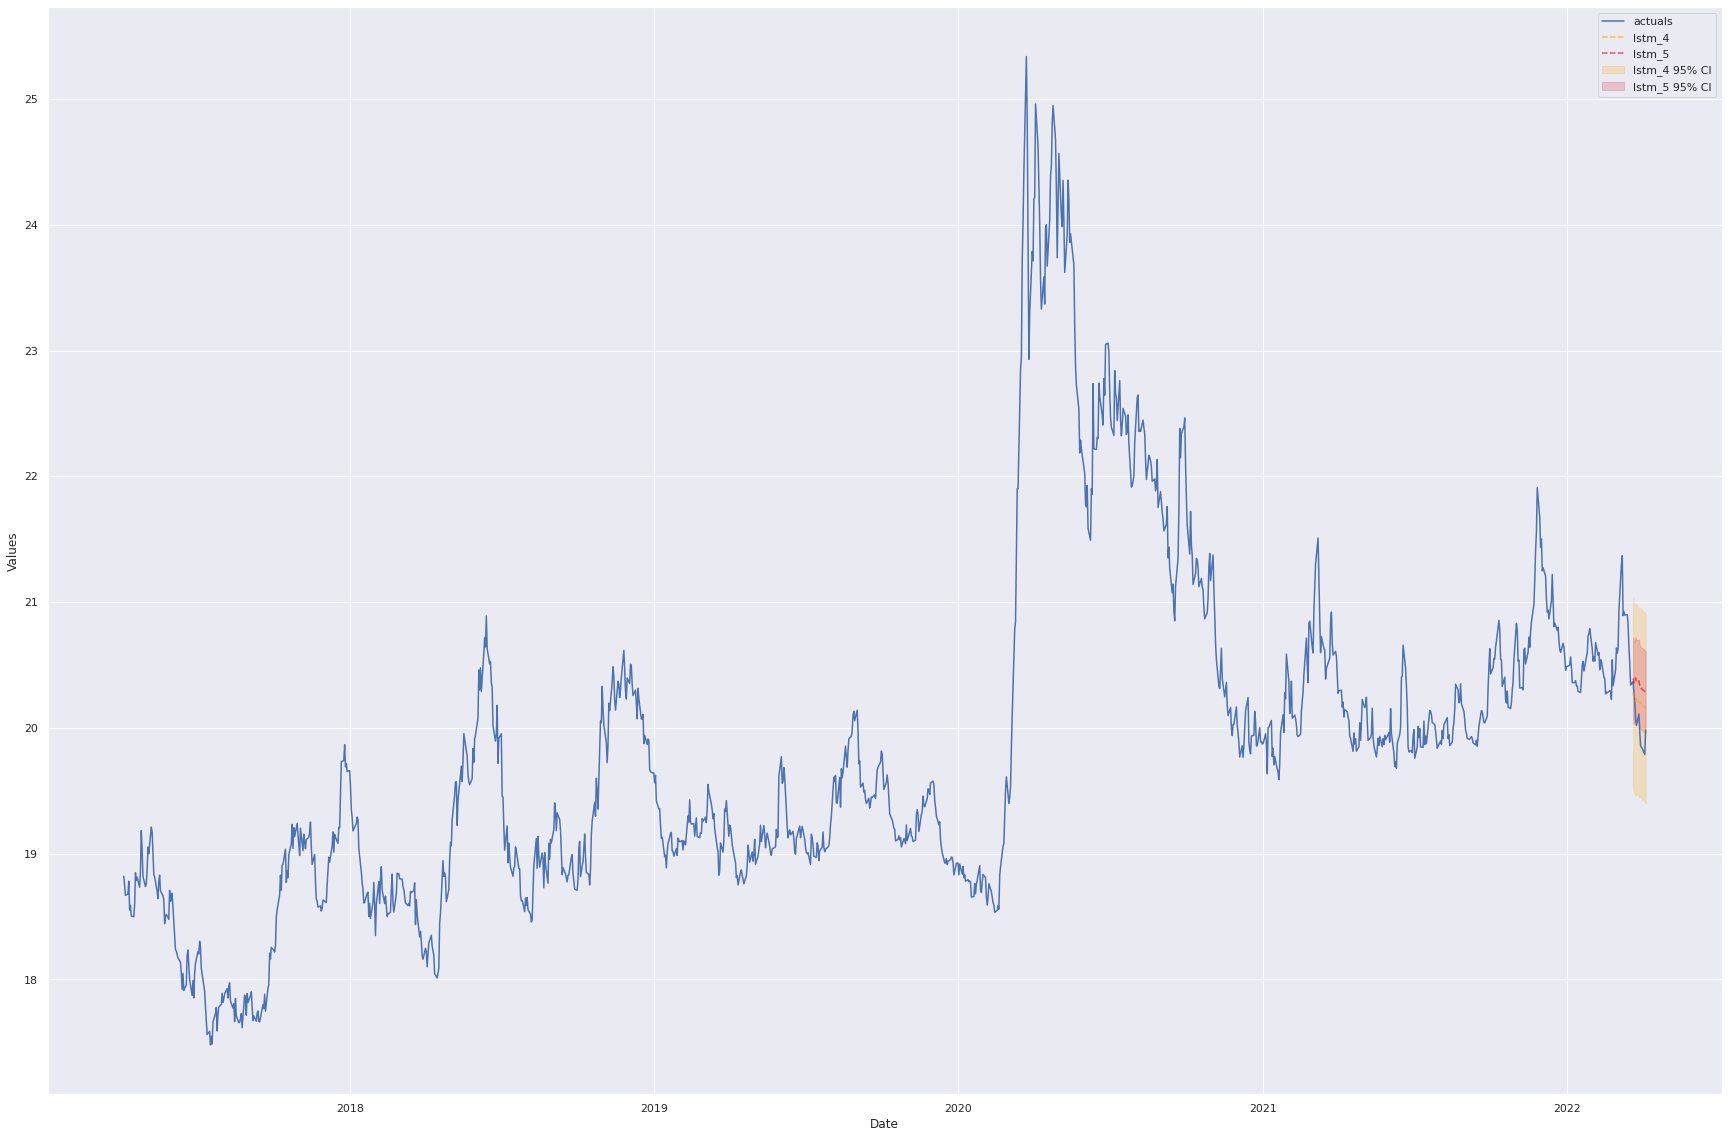

In [ ]:
f.manual_forecast(call_me='lstm_5',
                  lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(24,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [ ]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_4          0.009999          0.236074       -0.738573   
1        lstm_5          0.015738          0.348516       -2.789151   
2        lstm_3          0.031203          0.640797      -11.809660   
3        lstm_2          0.045590          0.937549      -26.421022   
4     lstm_lag1          0.105368          2.131188     -140.690165   
5  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False

Epoch 1/30
32/32 [==============================] - 7s 56ms/step - loss: 0.3137 - val_loss: 0.0760
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1841 - val_loss: 0.2128
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1094 - val_loss: 0.1853
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0953 - val_loss: 0.1416
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0675 - val_loss: 0.0802
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0626
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0427 - val_loss: 0.0643
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0418 - val_loss: 0.0582
Epoch 9/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.0558
Epoch 10/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.0548
Epoch 11/30
32/32 

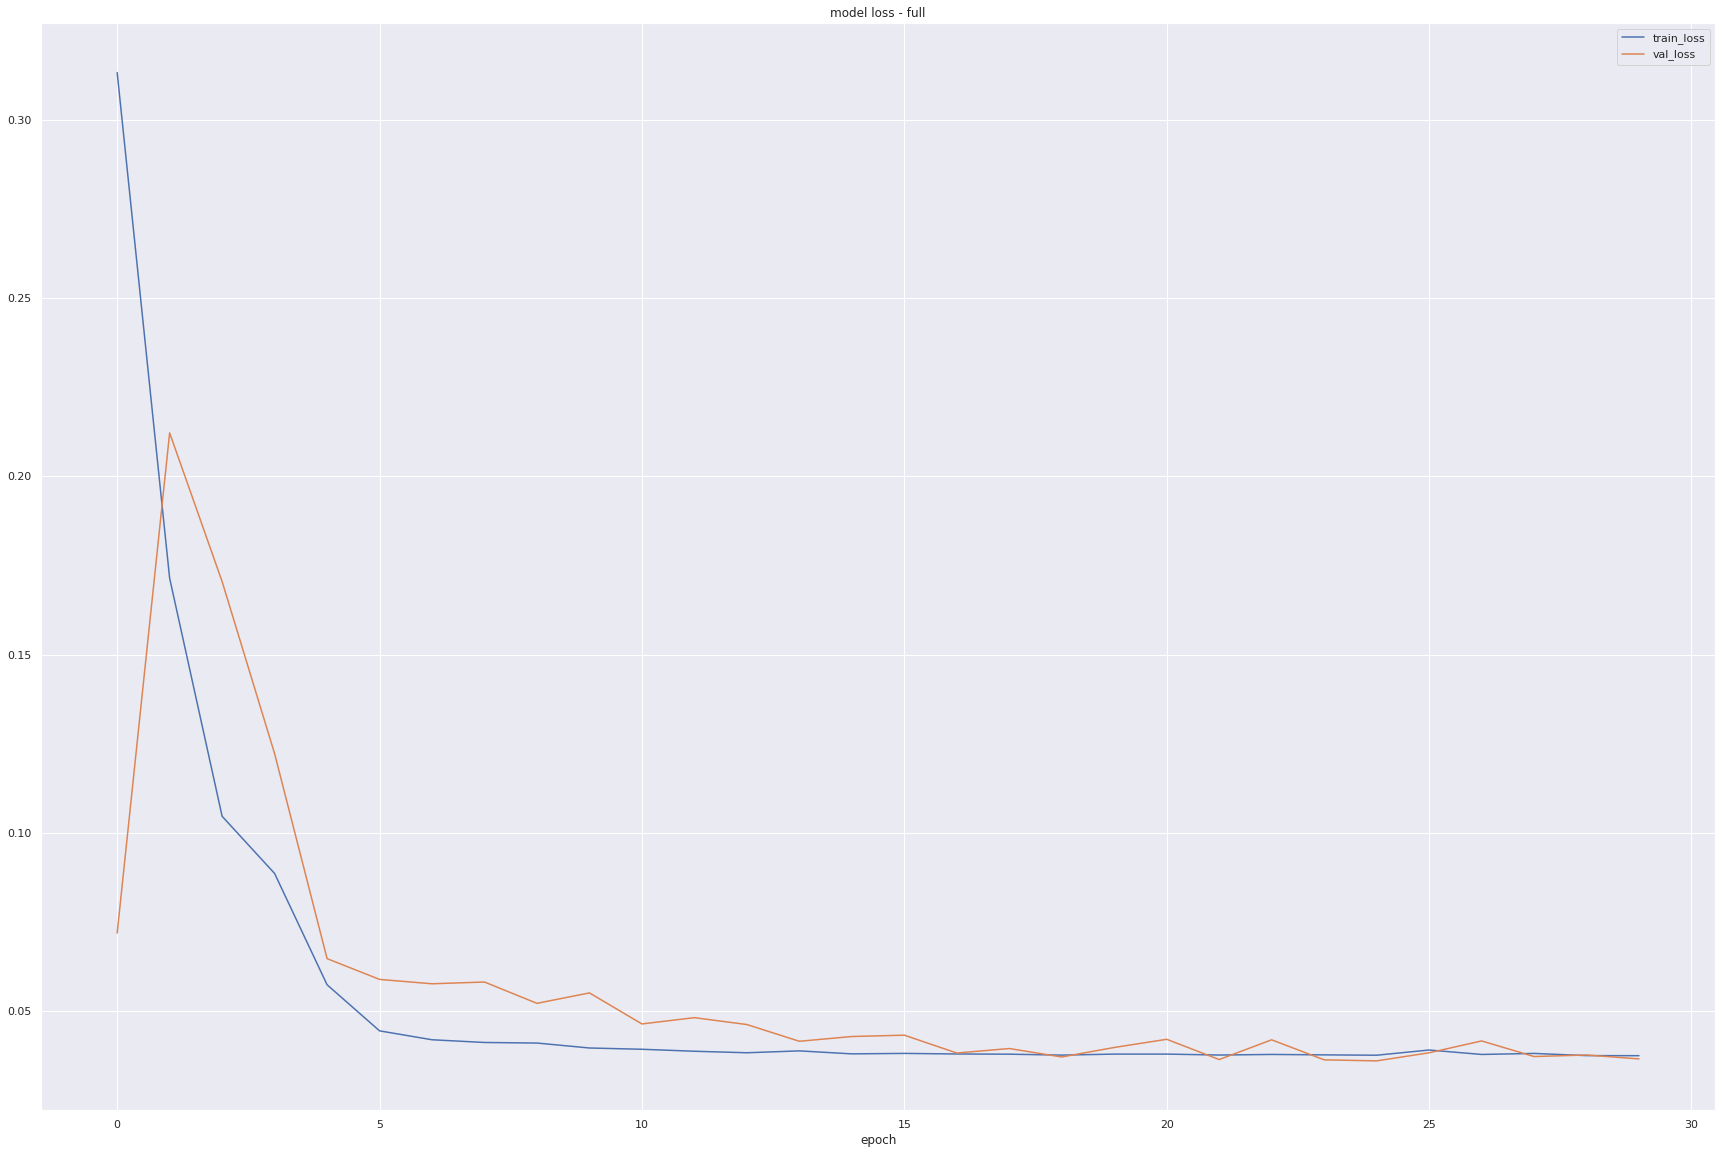

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_4          0.009999          0.236074       -0.738573   
1        lstm_6          0.013303          0.302610       -1.856685   
2        lstm_5          0.015738          0.348516       -2.789151   
3        lstm_3          0.031203          0.640797      -11.809660   
4        lstm_2          0.045590          0.937549      -26.421022   
5     lstm_lag1          0.105368          2.131188     -140.690165   
6  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False

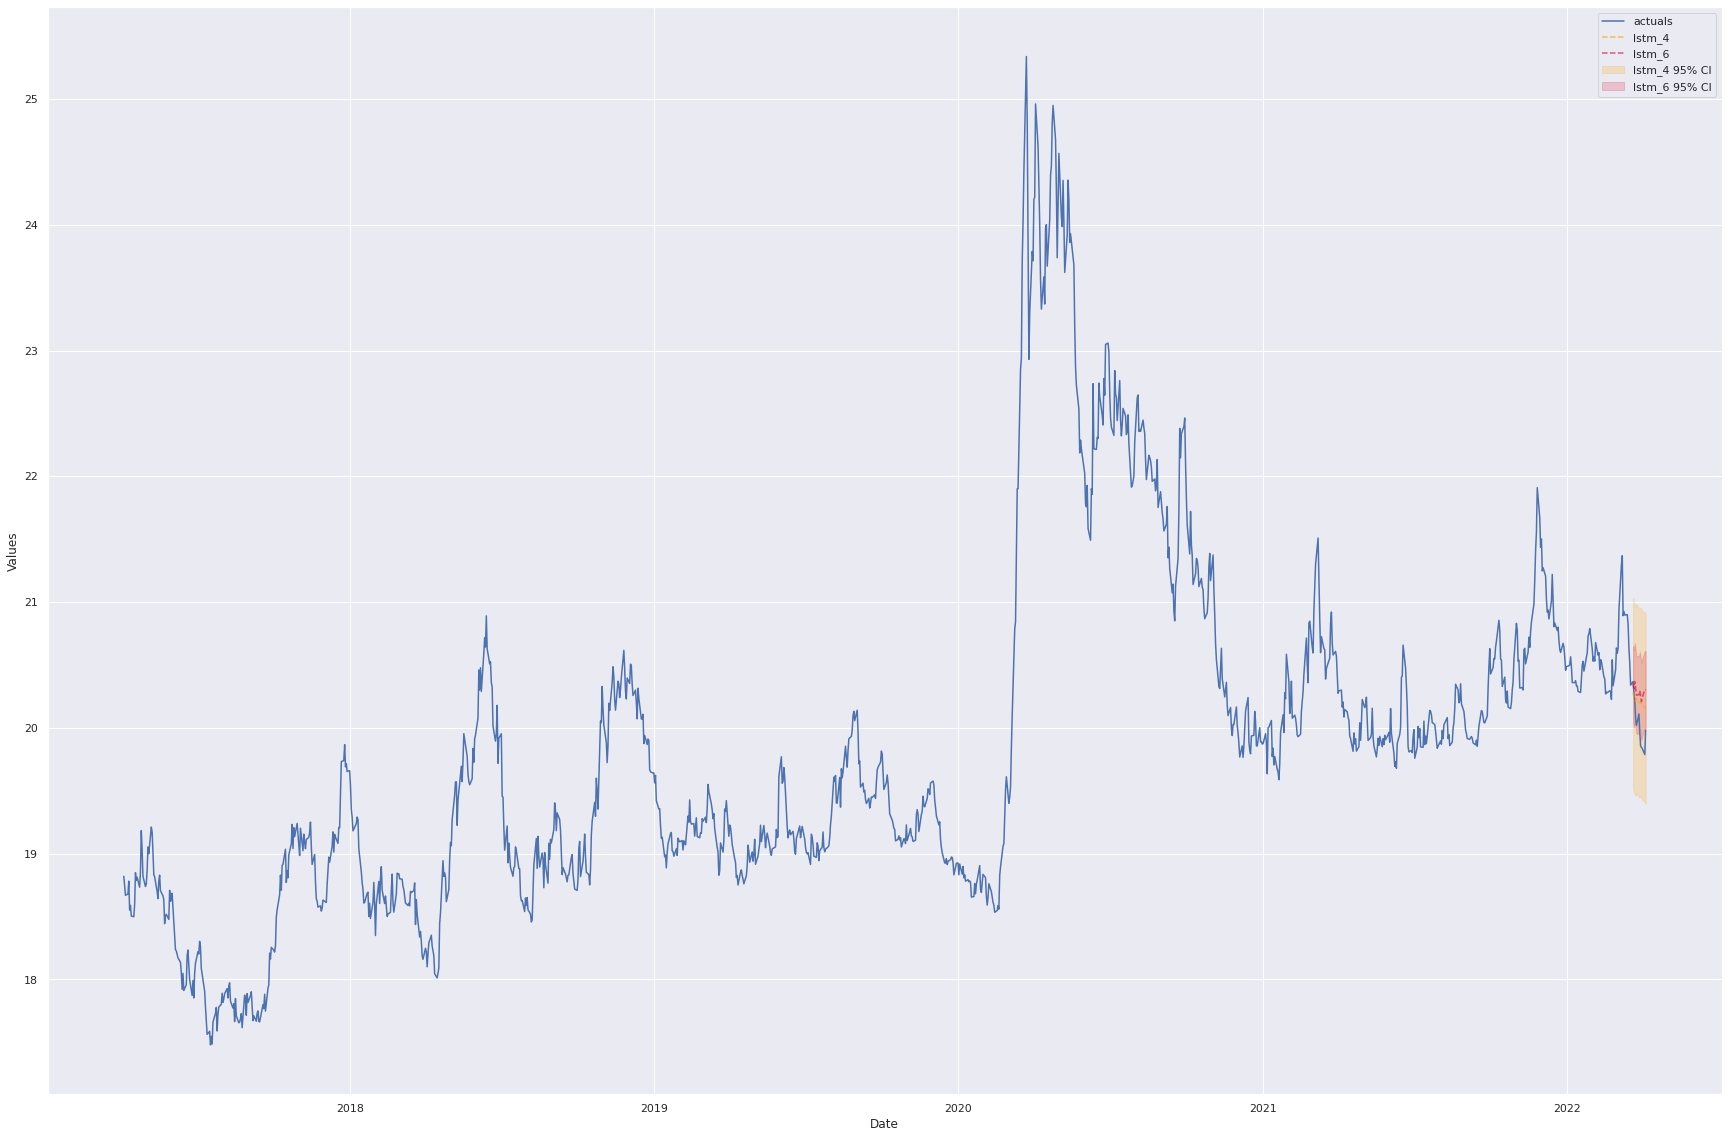

In [ ]:
f.manual_forecast(call_me='lstm_6',
                  lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(36,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

Epoch 1/30
32/32 [==============================] - 11s 60ms/step - loss: 0.2964 - val_loss: 0.0598
Epoch 2/30
32/32 [==============================] - 0s 8ms/step - loss: 0.1268 - val_loss: 0.1404
Epoch 3/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0908 - val_loss: 0.1283
Epoch 4/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0513 - val_loss: 0.0550
Epoch 5/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0421 - val_loss: 0.0613
Epoch 6/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0414 - val_loss: 0.0527
Epoch 7/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0405 - val_loss: 0.0558
Epoch 8/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0409 - val_loss: 0.0501
Epoch 9/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0399 - val_loss: 0.0469
Epoch 10/30
32/32 [==============================] - 1s 16ms/step - loss: 0.0400 - val_loss: 0.0466
Epoch 11/30
32/3

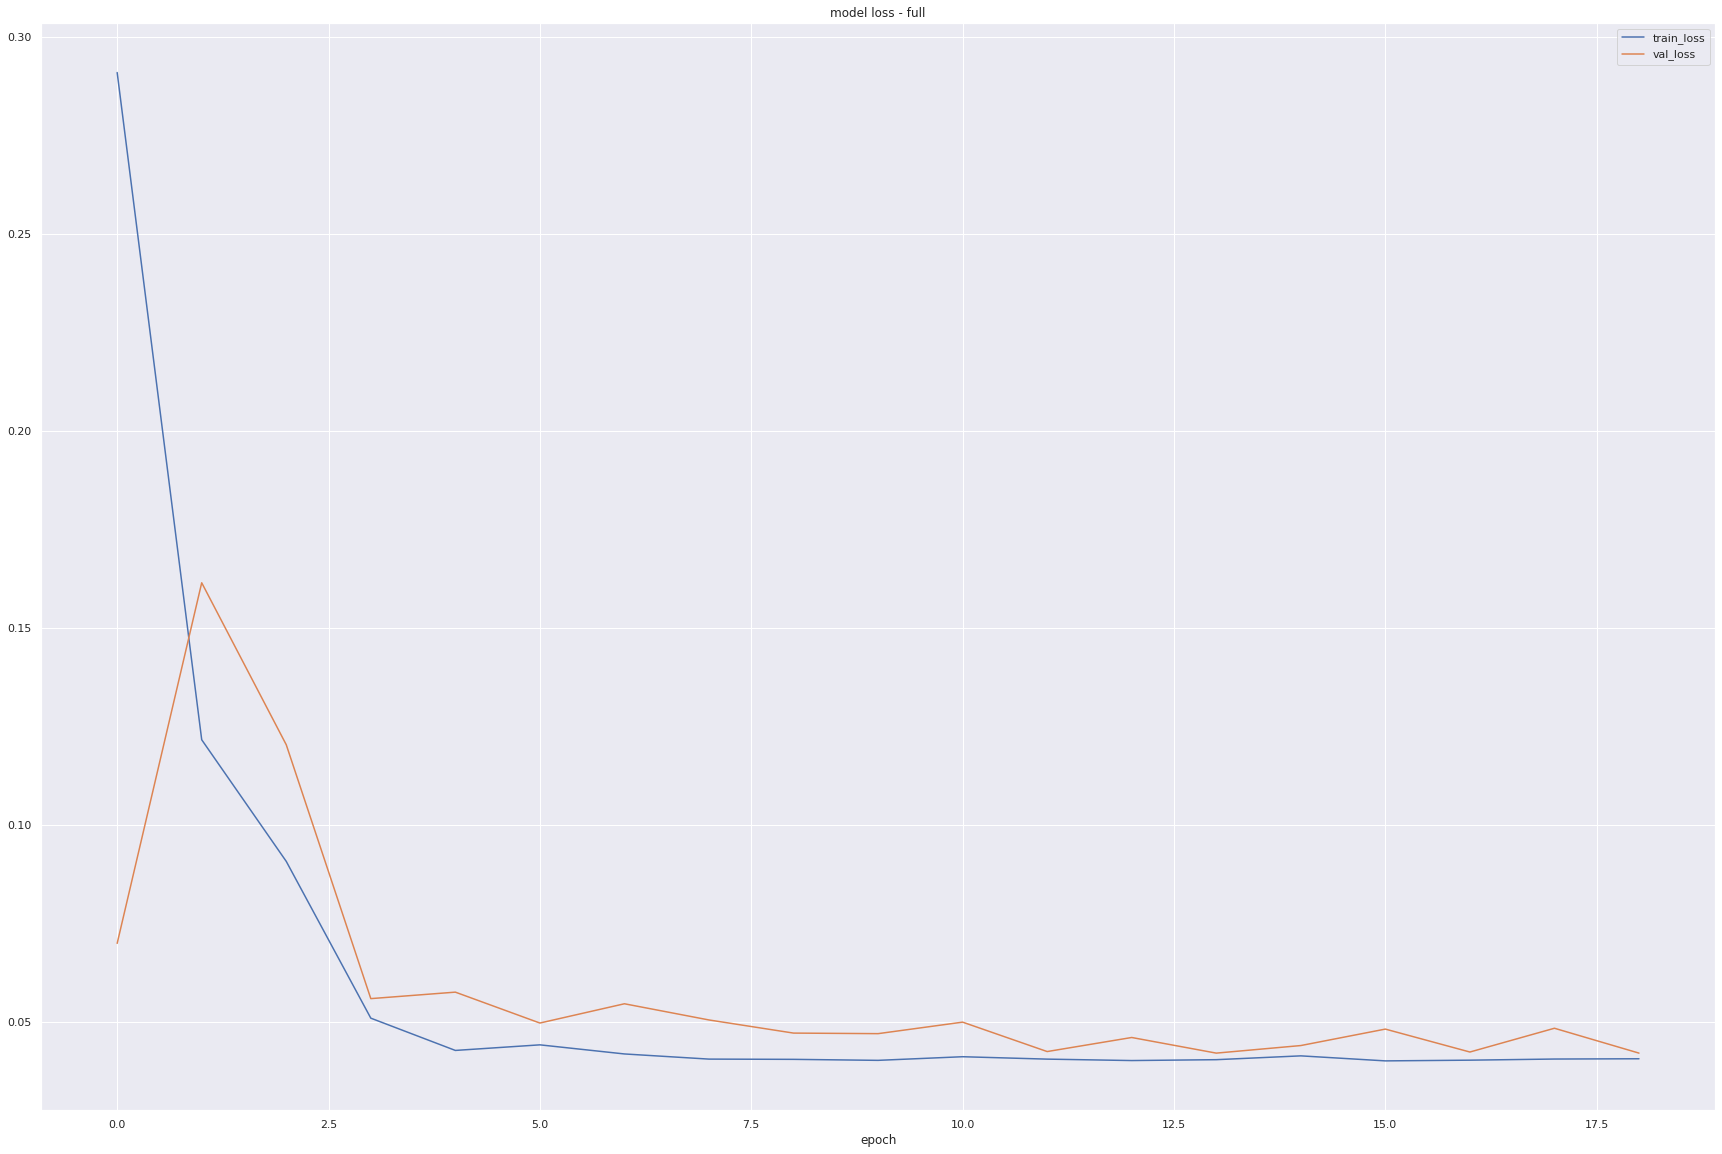

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_4          0.009999          0.236074       -0.738573   
1        lstm_6          0.013303          0.302610       -1.856685   
2        lstm_5          0.015738          0.348516       -2.789151   
3        lstm_7          0.021799          0.459855       -5.596875   
4        lstm_3          0.031203          0.640797      -11.809660   
5        lstm_2          0.045590          0.937549      -26.421022   
6     lstm_lag1          0.105368          2.131188     -140.690165   
7  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False

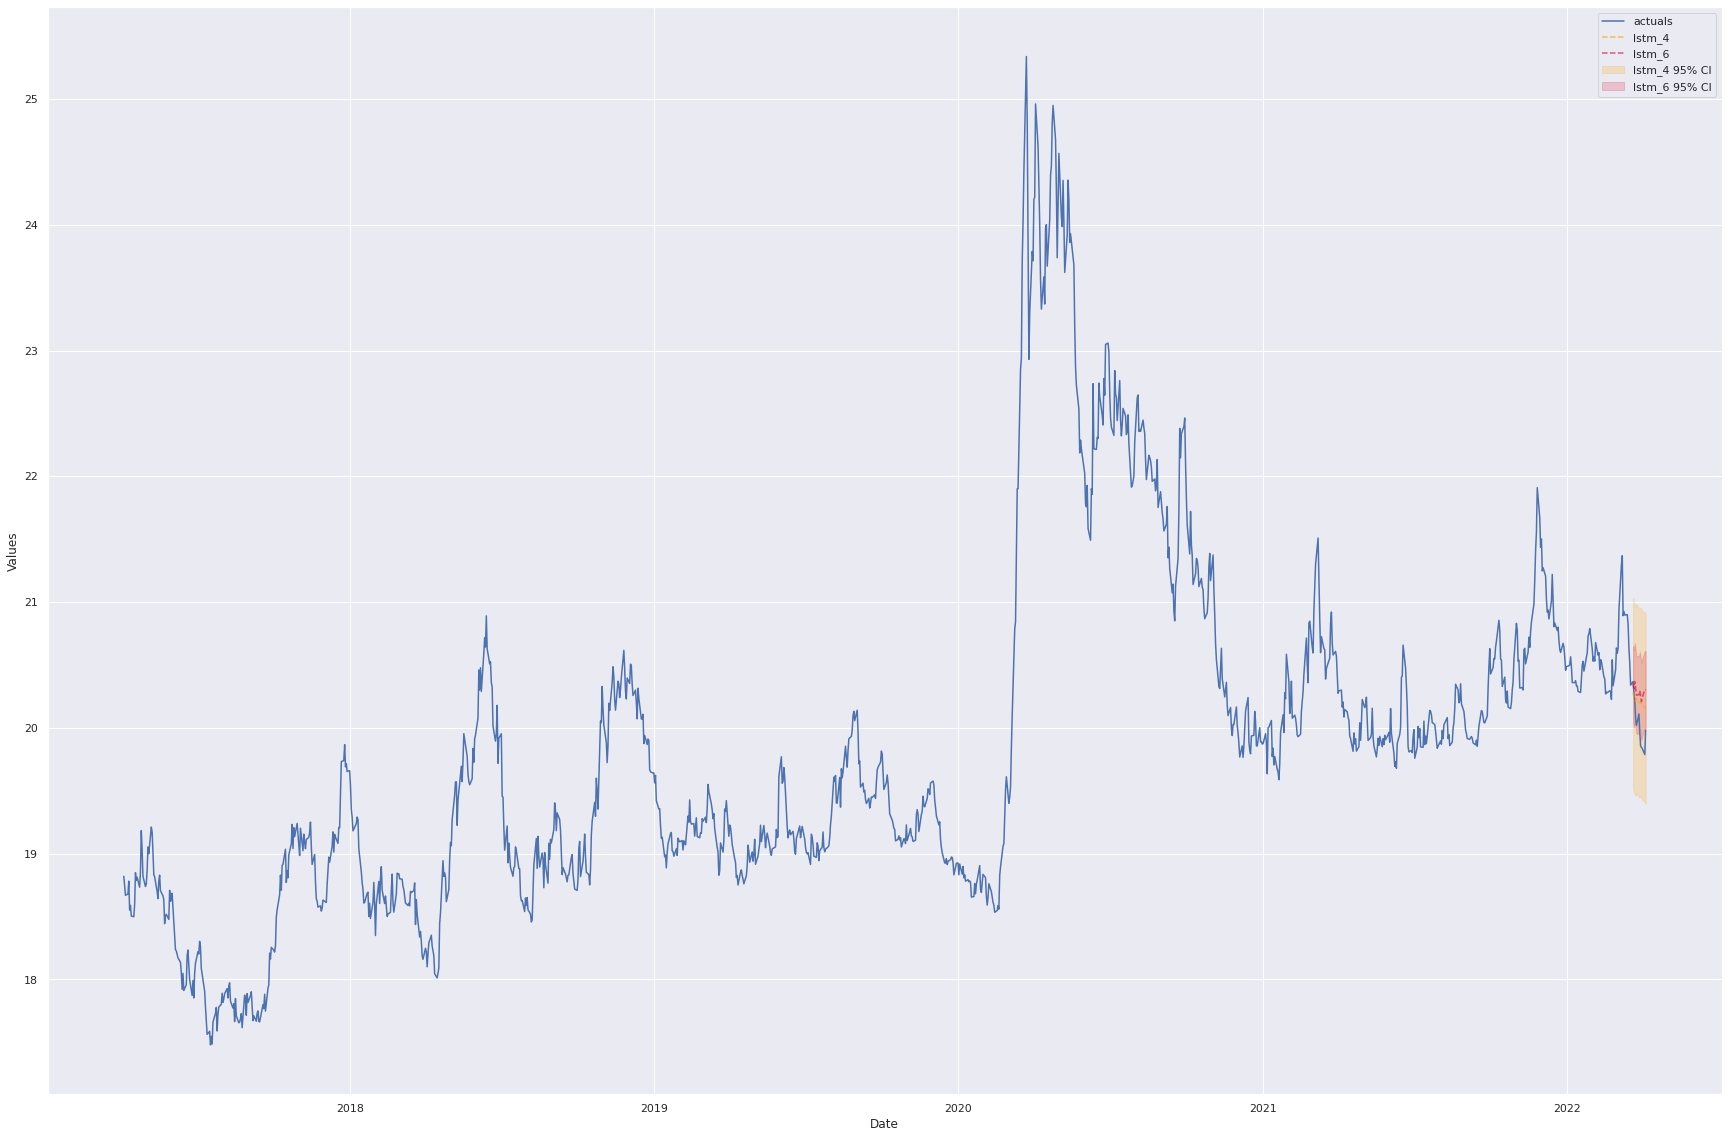

In [ ]:

f.manual_forecast(call_me='lstm_7',
                  lags=2,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(36,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

In [ ]:
f.manual_forecast(call_me='lstm_5',
                  lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(24,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=False)
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

Epoch 1/30
32/32 [==============================] - 8s 58ms/step - loss: 0.3167 - val_loss: 0.0822
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 0.2211 - val_loss: 0.1067
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1203 - val_loss: 0.1536
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1044 - val_loss: 0.1479
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0887 - val_loss: 0.1273
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0593 - val_loss: 0.0805
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.0678
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0432 - val_loss: 0.0612
Epoch 9/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.0609
Epoch 10/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.0566
Epoch 11/30
32/32 

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_4          0.009999          0.236074       -0.738573   
1        lstm_6          0.013303          0.302610       -1.856685   
2        lstm_5          0.014553          0.332787       -2.454847   
3        lstm_7          0.021799          0.459855       -5.596875   
4        lstm_3          0.031203          0.640797      -11.809660   
5        lstm_2          0.045590          0.937549      -26.421022   
6     lstm_lag1          0.105368          2.131188     -140.690165   
7  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False

In [ ]:
f.manual_forecast(call_me='lstm_8',
                  lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(36,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=False)
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

Epoch 1/30
32/32 [==============================] - 8s 94ms/step - loss: 0.3117 - val_loss: 0.0737
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1746 - val_loss: 0.2125
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1034 - val_loss: 0.1463
Epoch 4/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0832 - val_loss: 0.1164
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0528 - val_loss: 0.0663
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0426 - val_loss: 0.0661
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0419 - val_loss: 0.0592
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.0576
Epoch 9/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0536
Epoch 10/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0398 - val_loss: 0.0523
Epoch 11/30
32/32 

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_8          0.009879          0.231321       -0.669264   
1        lstm_4          0.009999          0.236074       -0.738573   
2        lstm_6          0.013303          0.302610       -1.856685   
3        lstm_5          0.014553          0.332787       -2.454847   
4        lstm_7          0.021799          0.459855       -5.596875   
5        lstm_3          0.031203          0.640797      -11.809660   
6        lstm_2          0.045590          0.937549      -26.421022   
7     lstm_lag1          0.105368          2.131188     -140.690165   
8  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False

In [ ]:
f.manual_forecast(call_me='lstm_9',
                  lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  #callbacks=EarlyStopping(monitor='val_loss',
                                          #patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(36,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=False)
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

Epoch 1/30
32/32 [==============================] - 7s 57ms/step - loss: 0.3129 - val_loss: 0.0759
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1848 - val_loss: 0.2006
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1098 - val_loss: 0.1662
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0915 - val_loss: 0.1598
Epoch 5/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0624 - val_loss: 0.0779
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0682
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0428 - val_loss: 0.0612
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.0627
Epoch 9/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0409 - val_loss: 0.0552
Epoch 10/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0400 - val_loss: 0.0548
Epoch 11/30
32/32 

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0        lstm_8          0.009879          0.231321       -0.669264   
1        lstm_4          0.009999          0.236074       -0.738573   
2        lstm_9          0.011190          0.261365       -1.131042   
3        lstm_6          0.013303          0.302610       -1.856685   
4        lstm_5          0.014553          0.332787       -2.454847   
5        lstm_7          0.021799          0.459855       -5.596875   
6        lstm_3          0.031203          0.640797      -11.809660   
7        lstm_2          0.045590          0.937549      -26.421022   
8     lstm_lag1          0.105368          2.131188     -140.690165   
9  lstm_default          0.107684          2.167878     -145.610795   

   best_model  
0        True  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False

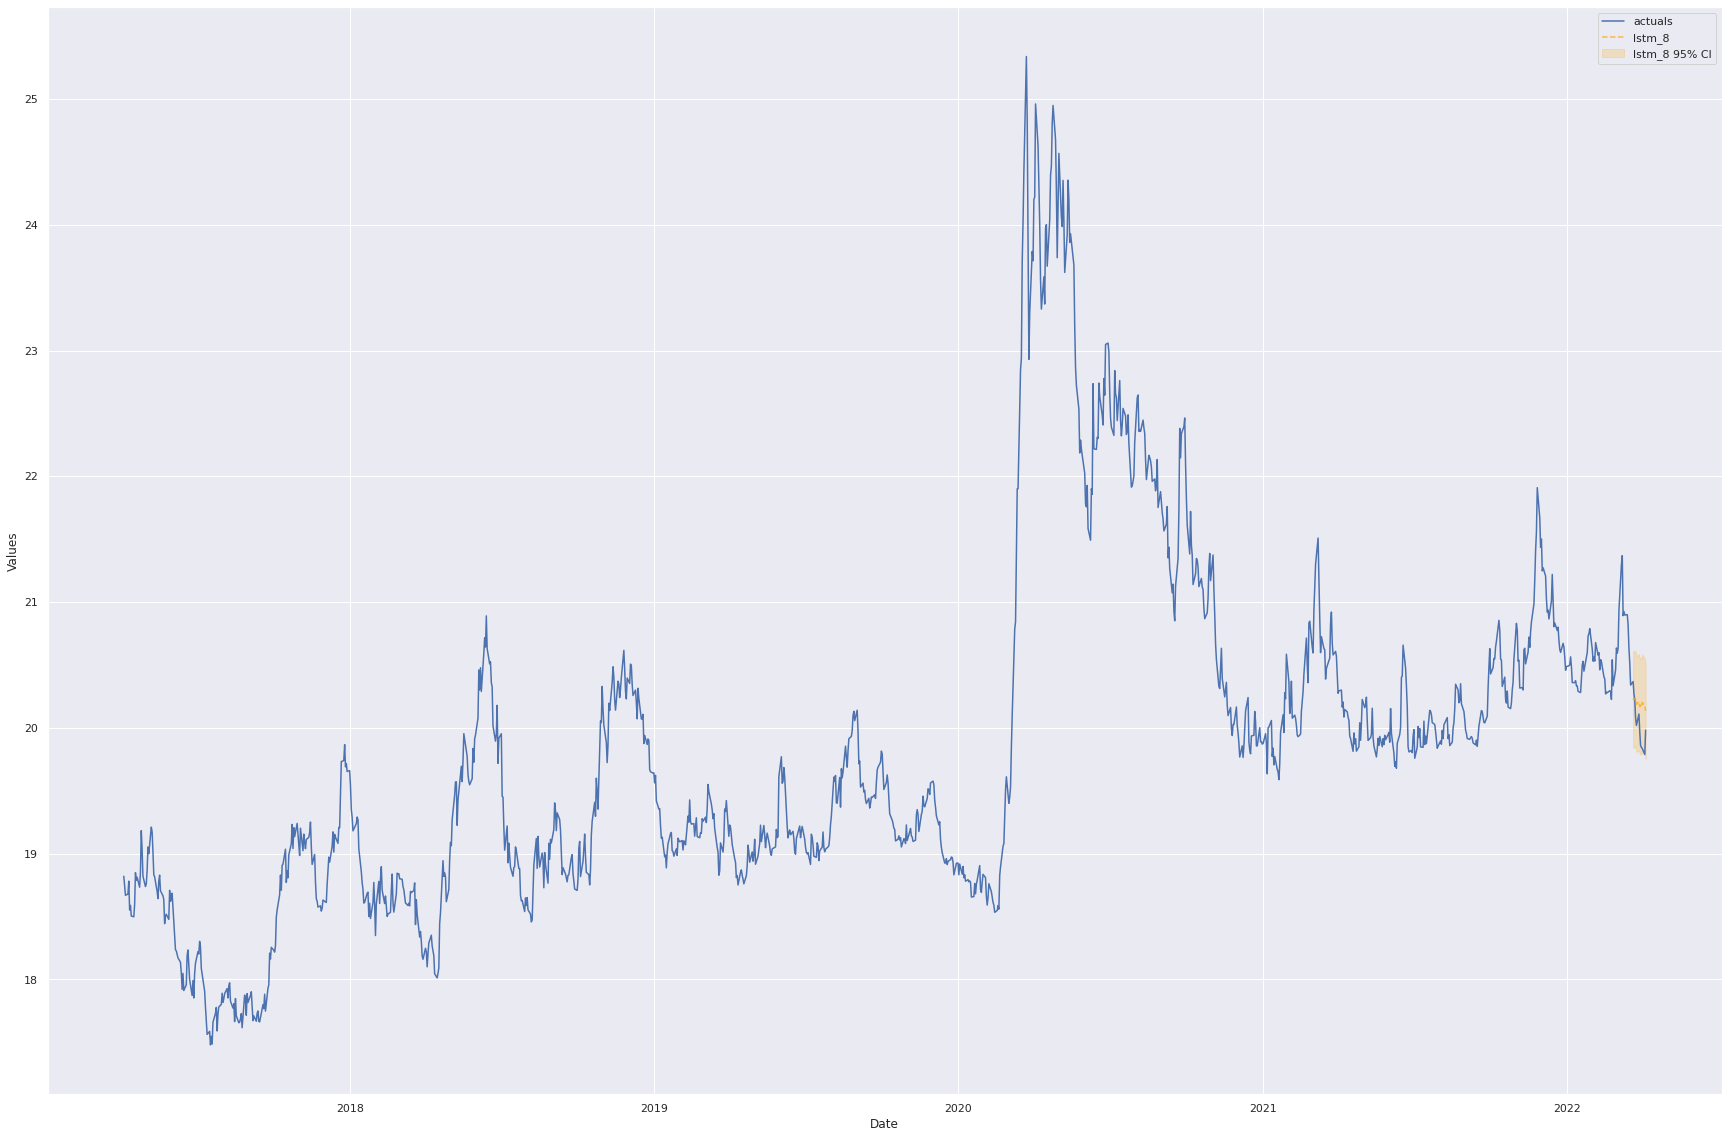

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_1',ci=True)

#Ahora se probará con un ARIMA

In [ ]:
f.set_estimator('arima')
f.manual_forecast(call_me='arima_1', order=(1,1,1))
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]


ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0         lstm_8          0.009879          0.231321       -0.669264   
1         lstm_4          0.009999          0.236074       -0.738573   
2         lstm_9          0.011190          0.261365       -1.131042   
3         lstm_6          0.013303          0.302610       -1.856685   
4         lstm_5          0.014553          0.332787       -2.454847   
5        arima_1          0.015591          0.352942       -2.886008   
6         lstm_7          0.021799          0.459855       -5.596875   
7         lstm_3          0.031203          0.640797      -11.809660   
8         lstm_2          0.045590          0.937549      -26.421022   
9      lstm_lag1          0.105368          2.131188     -140.690165   
10  lstm_default          0.107684          2.167878     -145.610795   

    best_model  
0         True  
1        False  
2        False  
3        False  
4        False  
5        False  
6        False  
7        False  
8        False  
9        False  
10       False

In [ ]:
f.manual_forecast(order=(1,1,2),call_me='arima_2')
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]


ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  LevelTestSetR2  \
0         lstm_8          0.009879          0.231321       -0.669264   
1         lstm_4          0.009999          0.236074       -0.738573   
2         lstm_9          0.011190          0.261365       -1.131042   
3         lstm_6          0.013303          0.302610       -1.856685   
4         lstm_5          0.014553          0.332787       -2.454847   
5        arima_2          0.014852          0.338799       -2.580804   
6        arima_1          0.015591          0.352942       -2.886008   
7         lstm_7          0.021799          0.459855       -5.596875   
8         lstm_3          0.031203          0.640797      -11.809660   
9         lstm_2          0.045590          0.937549      -26.421022   
10     lstm_lag1          0.105368          2.131188     -140.690165   
11  lstm_default          0.107684          2.167878     -145.610795   

    best_model  
0         True  
1        False  
2        False  
3        False  
4        False  
5        False  
6        False  
7        False  
8        False  
9        False  
10       False  
11       False

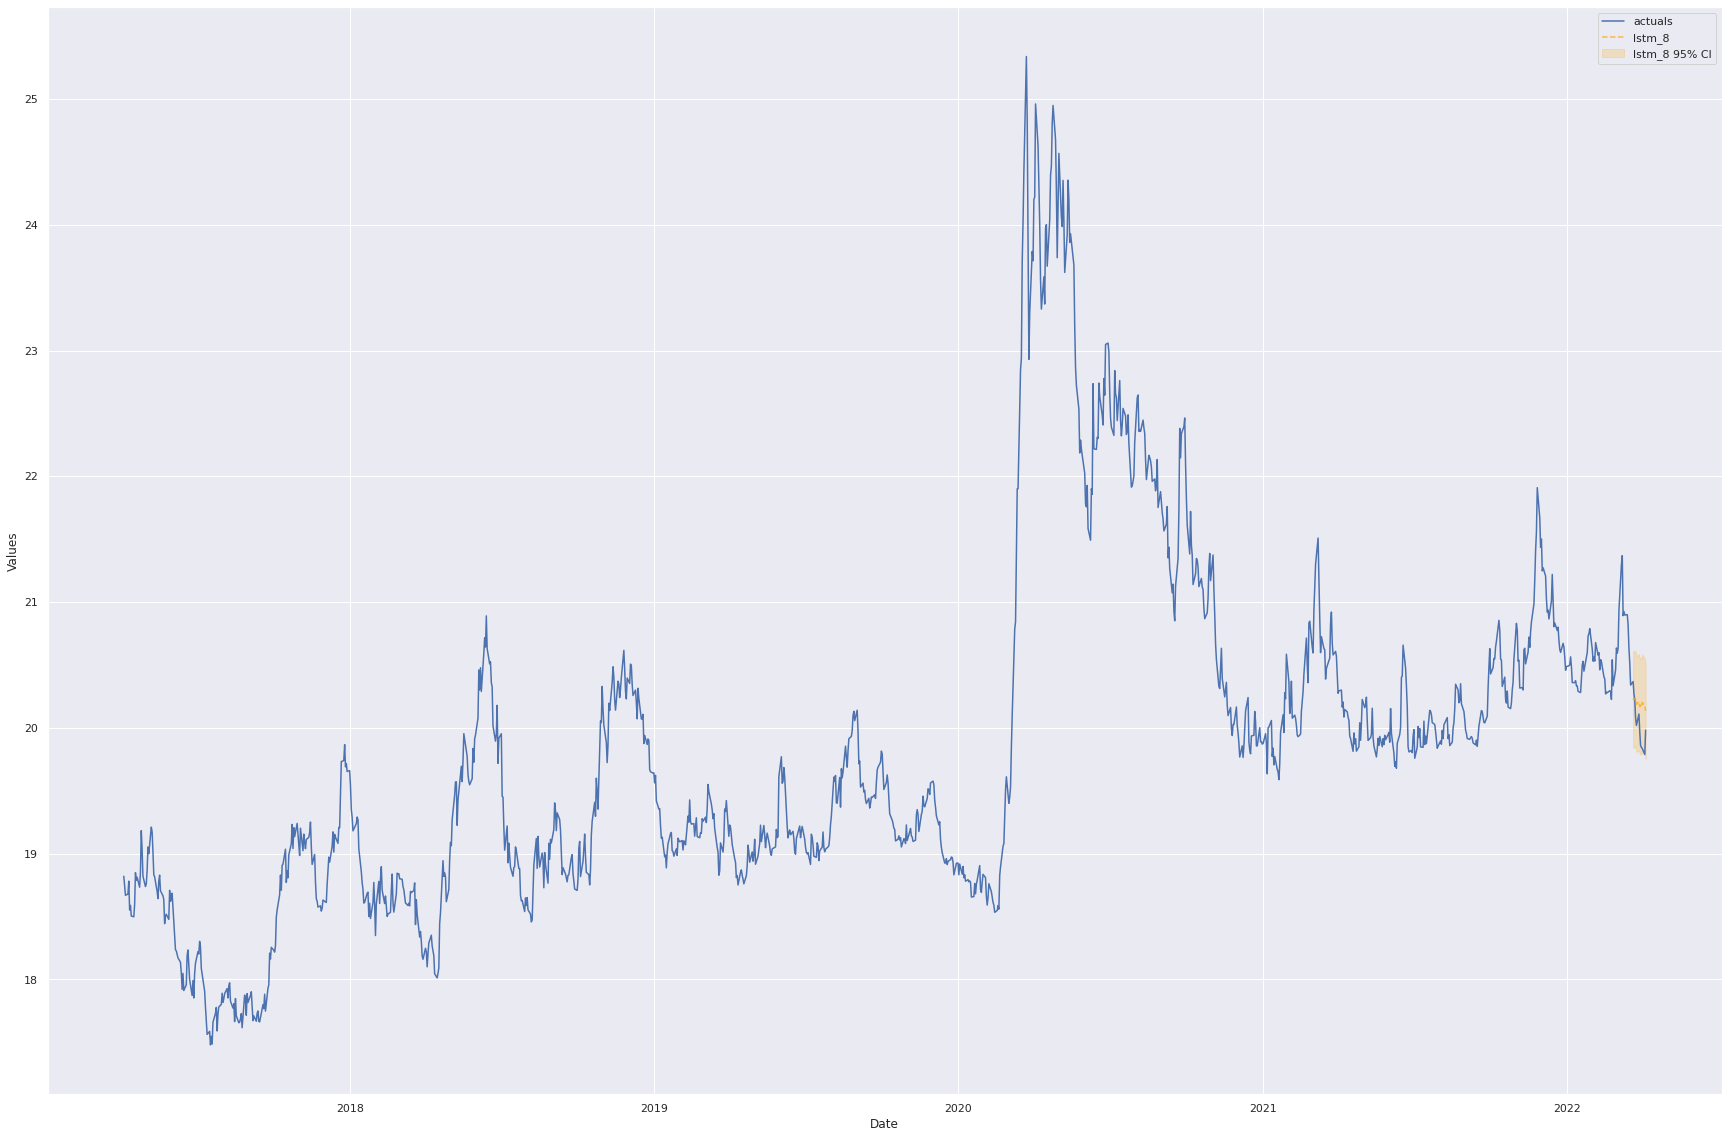

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_1',ci=True)

# GARCH

Al final se obtiene que el mejor modelo es el LSTM con las siguientes características:

lags=1,
                  batch_size=32,
                  epochs=30,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  learning_rate=0.001,
                  lstm_layer_sizes=(36,)*4,
                  dropout=(0,0,0,0),
                  plot_loss=False)

In [ ]:
import arch

In [ ]:
garch = arch.arch_model(fx['rtn_log'][1:], vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()


garch_forecast = garch_fitted.forecast(horizon=12)
#predicted_et = garch_forecast.mean['h.1'].iloc[-1]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.7150611109997714e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 78509095241419.36
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2775120675763163.0
Iteration:      4,   Func. Count:     49,   Neg. LLF: 9.84409706447568e+16
Iteration:      5,   Func. Count:     64,   Neg. LLF: 1.581213086873171e+19
Iteration:      6,   Func. Count:     77,   Neg. LLF: 2289861732690.3745
Iteration:      7,   Func. Count:     92,   Neg. LLF: 4.6433445262191104e+17
Iteration:      8,   Func. Count:    105,   Neg. LLF: 77482355634221.28
Iteration:      9,   Func. Count:    120,   Neg. LLF: 1.7196185235483025e+19
Iteration:     10,   Func. Count:    133,   Neg. LLF: 2340425846827.5825
Iteration:     11,   Func. Count:    148,   Neg. LLF: 7.703983038517348e+23
Iteration:     12,   Func. Count:    163,   Neg. LLF: 69220498386582.63
Iteration:     13,   Func. Count:    178,   Neg. LLF: 4.10680615088738e+18
Iteration:     14,   Func. Count

In [ ]:
fc_garch = garch.forecast(reindex=False, horizon=12,)  
fc_garch

TypeError: ignored

In [ ]:
garch_forecast.mean

h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2017-04-06       NaN       NaN       NaN       NaN       NaN       NaN   
2017-04-07       NaN       NaN       NaN       NaN       NaN       NaN   
2017-04-10       NaN       NaN       NaN       NaN       NaN       NaN   
2017-04-11       NaN       NaN       NaN       NaN       NaN       NaN   
2017-04-12       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-03-30       NaN       NaN       NaN       NaN       NaN       NaN   
2022-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
2022-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-04-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-04-05 -0.000176 -0.000176 -0.000176 -0.000176 -0.000176 -0.000176   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2017-04-06       NaN       NaN       NaN       NaN       NaN       NaN  
2017-04-07       NaN       NaN       NaN       NaN       NaN       NaN  
2017-04-10       NaN       NaN       NaN       NaN       NaN       NaN  
2017-04-11       NaN       NaN       NaN       NaN       NaN       NaN  
2017-04-12       NaN       NaN       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...       ...       ...  
2022-03-30       NaN       NaN       NaN       NaN       NaN       NaN  
2022-03-31       NaN       NaN       NaN       NaN       NaN       NaN  
2022-04-01       NaN       NaN       NaN       NaN       NaN       NaN  
2022-04-04       NaN       NaN       NaN       NaN       NaN       NaN  
2022-04-05 -0.000176 -0.000176 -0.000176 -0.000176 -0.000176 -0.000176  

[1304 rows x 12 columns]